In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exploration of the Training Set




In [ ]:
!pip install pandas

In [211]:
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    HistGradientBoostingClassifier
)

# If you have these installed:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Travelers/Training_TriGuard.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Travelers/Testing_TriGuard.csv')


In [3]:
df_sub = df[df.subrogation == 1]
df_nosub = df[df.subrogation == 0]

In [4]:
cols = df.columns
print(cols)

Index(['subrogation', 'claim_number', 'year_of_born', 'gender',
       'email_or_tel_available', 'safety_rating', 'annual_income',
       'high_education_ind', 'address_change_ind', 'living_status', 'zip_code',
       'claim_date', 'claim_day_of_week', 'accident_site',
       'past_num_of_claims', 'witness_present_ind', 'liab_prct', 'channel',
       'policy_report_filed_ind', 'claim_est_payout', 'vehicle_made_year',
       'vehicle_category', 'vehicle_price', 'vehicle_color', 'vehicle_weight',
       'age_of_DL', 'accident_type', 'in_network_bodyshop', 'vehicle_mileage'],
      dtype='object')


In [5]:
categorical_vars = [
    "gender",
    "email_or_tel_available",
    "high_education_ind",
    "address_change_ind",
    "living_status",
    "zip_code",
    "claim_day_of_week",
    "accident_site",
    "witness_present_ind",
    "channel",
    "policy_report_filed_ind",
    "vehicle_category",
    "vehicle_color",
    "accident_type",
    "in_network_bodyshop"
]


In [6]:
numerical_vars = [
    "year_of_born",
    "safety_rating",
    "annual_income",
    "past_num_of_claims",
    "liab_prct",
    "claim_est_payout",
    "vehicle_made_year",
    "vehicle_price",
    "vehicle_weight",
    "age_of_DL",
    "vehicle_mileage"
]


In [ ]:
for col in categorical_vars:
    print("=" * 60)
    print(f"🔹 Column: {col}\n")

    # Value counts (absolute counts)
    sub_counts = df_sub[col].value_counts(dropna=False)
    nosub_counts = df_nosub[col].value_counts(dropna=False)
    total_counts = df[col].value_counts(dropna=False)

    # Ratios (percentage of total)
    sub_ratio = sub_counts / len(df_sub)
    nosub_ratio = nosub_counts / len(df_nosub)
    total_ratio = total_counts / len(df)

    # Print results

    print("📌 Subrogation = 1")
    print(pd.DataFrame({"count": sub_counts, "ratio": sub_ratio.round(3)}))
    print()

    print("📌 Subrogation = 0")
    print(pd.DataFrame({"count": nosub_counts, "ratio": nosub_ratio.round(3)}))
    print("\n")

    print("📌 Total")
    print(pd.DataFrame({"count": total_counts, "ratio": total_ratio.round(3)}))
    print("=" * 60)
    print()


🔹 Column: subrogation

📌 Subrogation = 1
             count  ratio
subrogation              
1.0           4115    1.0

📌 Subrogation = 0
             count  ratio
subrogation              
0.0          13884    1.0


📌 Total
             count  ratio
subrogation              
0.0          13884  0.771
1.0           4115  0.229
NaN              2  0.000

🔹 Column: gender

📌 Subrogation = 1
        count  ratio
gender              
F        2180   0.53
M        1935   0.47

📌 Subrogation = 0
        count  ratio
gender              
M        7337  0.528
F        6547  0.472


📌 Total
        count  ratio
gender              
M        9273  0.515
F        8727  0.485
NaN         1  0.000

🔹 Column: email_or_tel_available

📌 Subrogation = 1
                        count  ratio
email_or_tel_available              
1.0                      2621  0.637
0.0                      1494  0.363

📌 Subrogation = 0
                        count  ratio
email_or_tel_available              
1.0        

In [ ]:
for col in numerical_vars:
    print("=" * 70)
    print(f"🔹 Numerical Column: {col}\n")

    print("📌 Subrogation = 1 (df_sub)")
    print(df_sub[col].describe())
    print()

    print("📌 Subrogation = 0 (df_nosub)")
    print(df_nosub[col].describe())
    print()

    print("📌 Full Dataset (df)")
    print(df[col].describe())
    print("\n")



🔹 Numerical Column: claim_number

📌 Subrogation = 1 (df_sub)
count    4.115000e+03
mean     5.497373e+06
std      2.552774e+06
min      1.000923e+06
25%      3.331958e+06
50%      5.499338e+06
75%      7.633938e+06
max      9.996173e+06
Name: claim_number, dtype: float64

📌 Subrogation = 0 (df_nosub)
count    1.388400e+04
mean     5.510390e+06
std      2.588662e+06
min      1.000059e+06
25%      3.291684e+06
50%      5.526770e+06
75%      7.726316e+06
max      9.999490e+06
Name: claim_number, dtype: float64

📌 Full Dataset (df)
count    1.800100e+04
mean     5.506903e+06
std      2.580766e+06
min      0.000000e+00
25%      3.303928e+06
50%      5.522119e+06
75%      7.707404e+06
max      9.999490e+06
Name: claim_number, dtype: float64


🔹 Numerical Column: year_of_born

📌 Subrogation = 1 (df_sub)
count    4115.000000
mean     1980.918104
std        12.044495
min      1914.000000
25%      1974.000000
50%      1982.000000
75%      1990.000000
max      2007.000000
Name: year_of_born, dtyp

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(col):
    plt.figure(figsize=(12, 5))

    # KDE plot
    plt.subplot(1, 2, 1)
    sns.kdeplot(df_sub[col], label="Subrogation = 1", fill=True, alpha=0.5)
    sns.kdeplot(df_nosub[col], label="Subrogation = 0", fill=True, alpha=0.5)
    plt.title(f"KDE Plot: {col}")
    plt.legend()

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x="subrogation", y=col)
    plt.title(f"Boxplot: {col}")

    plt.tight_layout()
    plt.show()


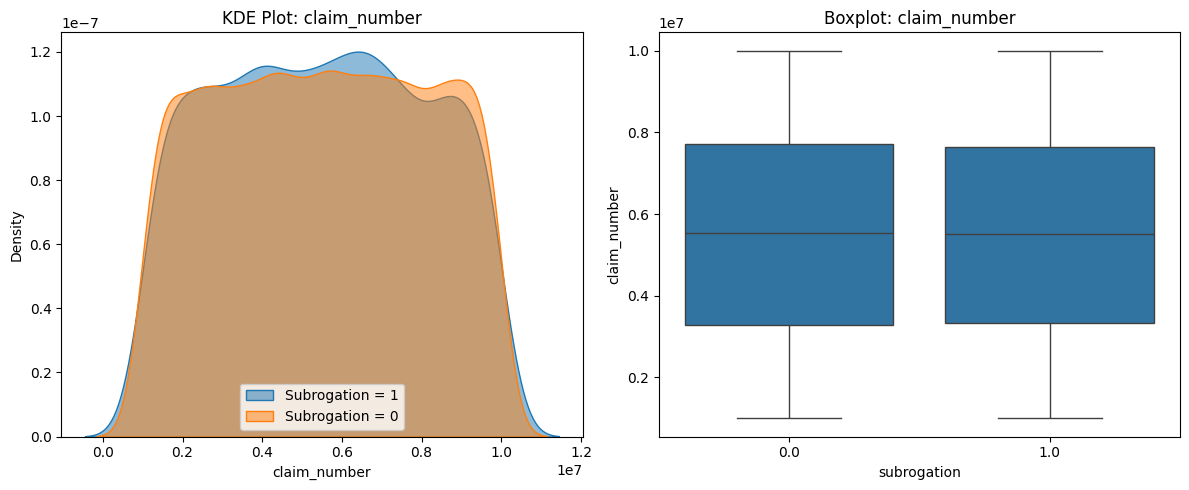

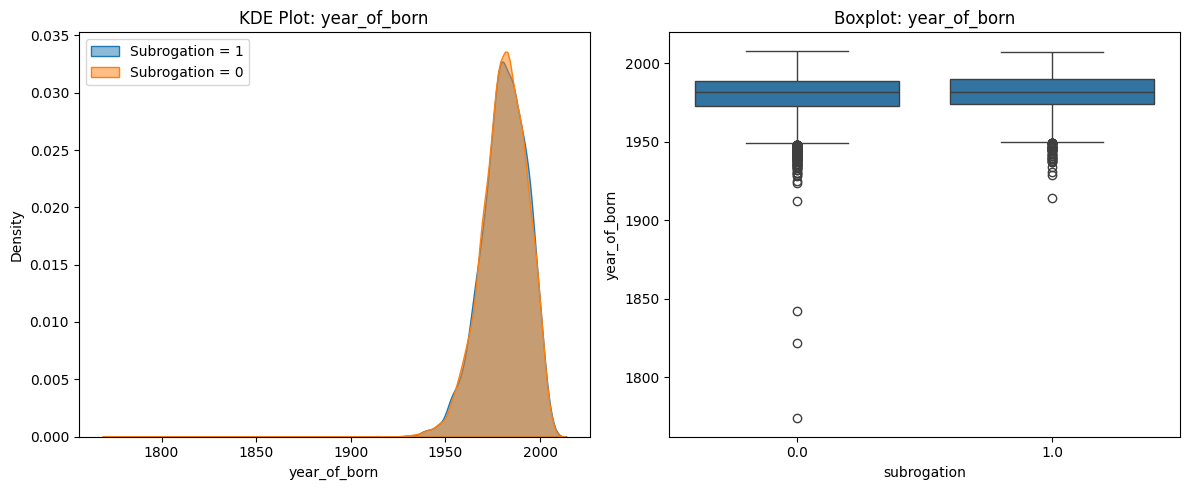

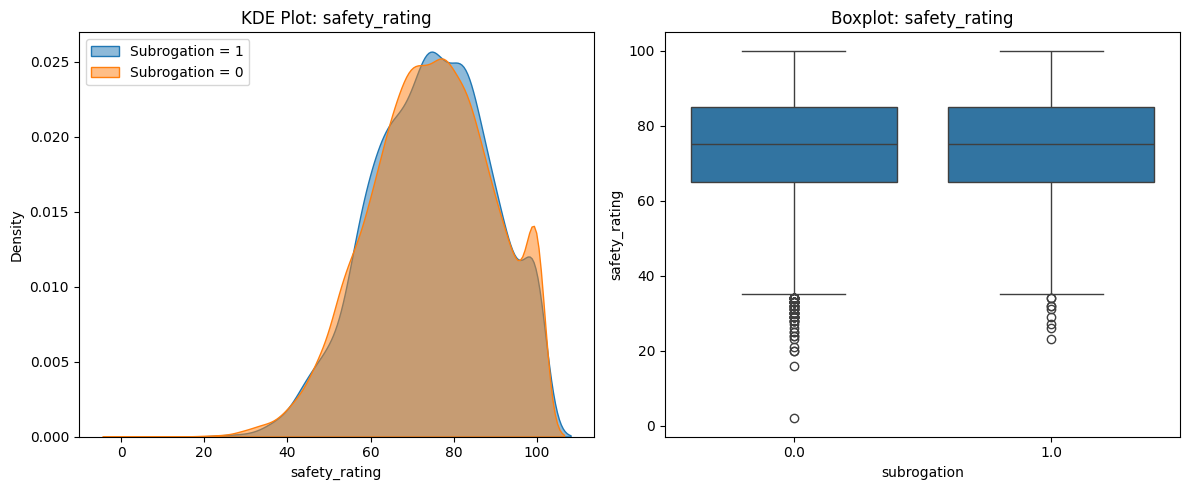

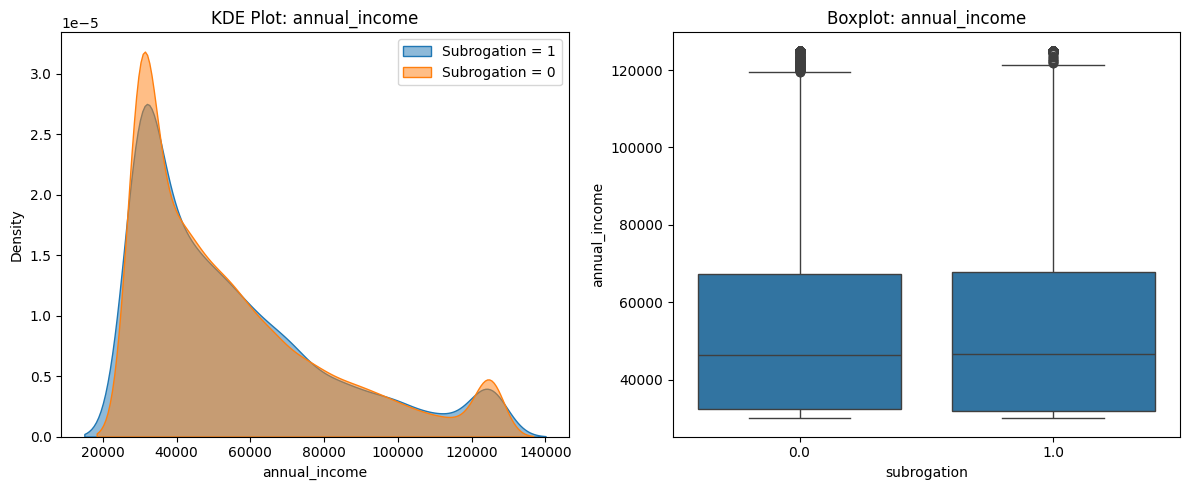

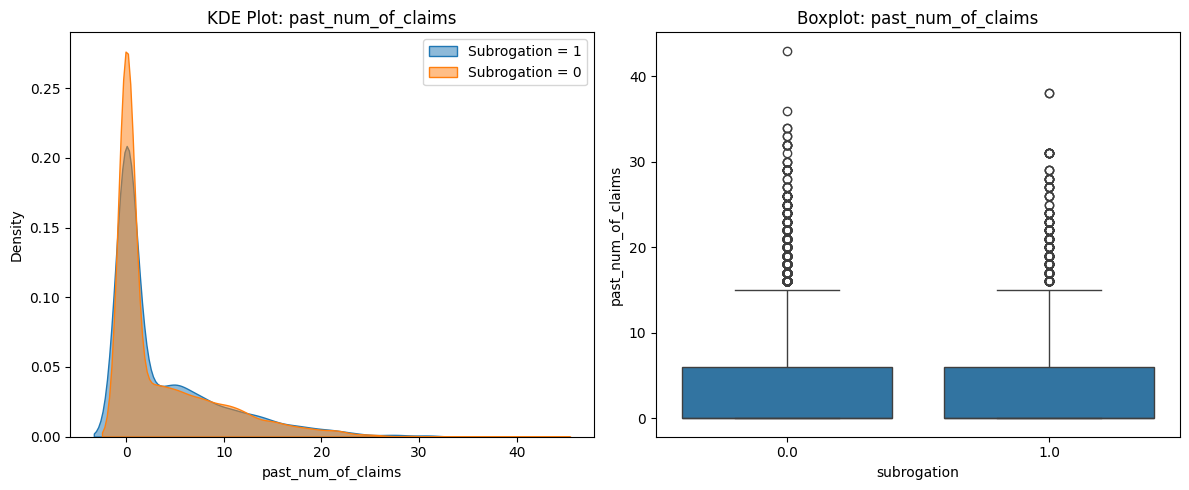

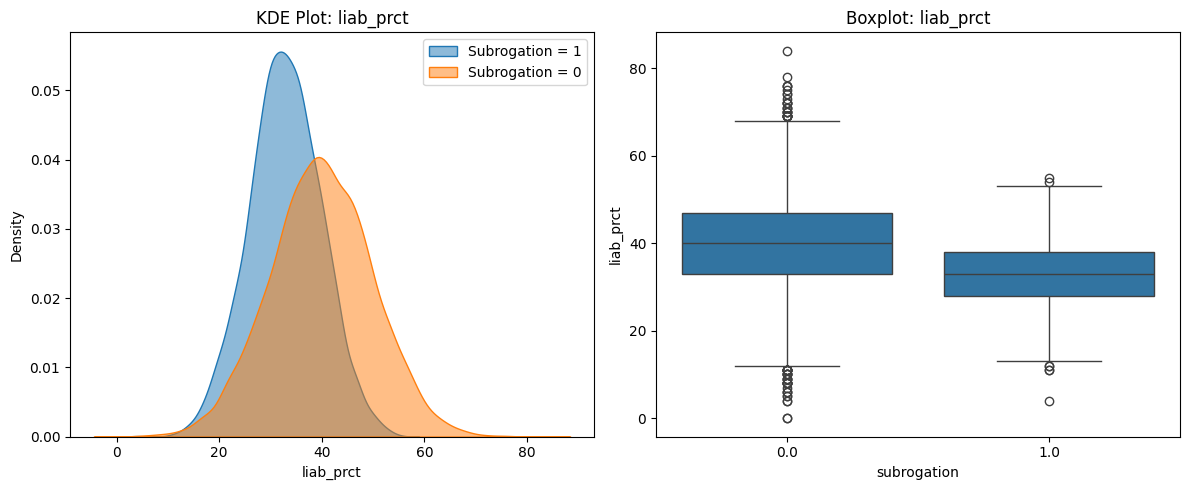

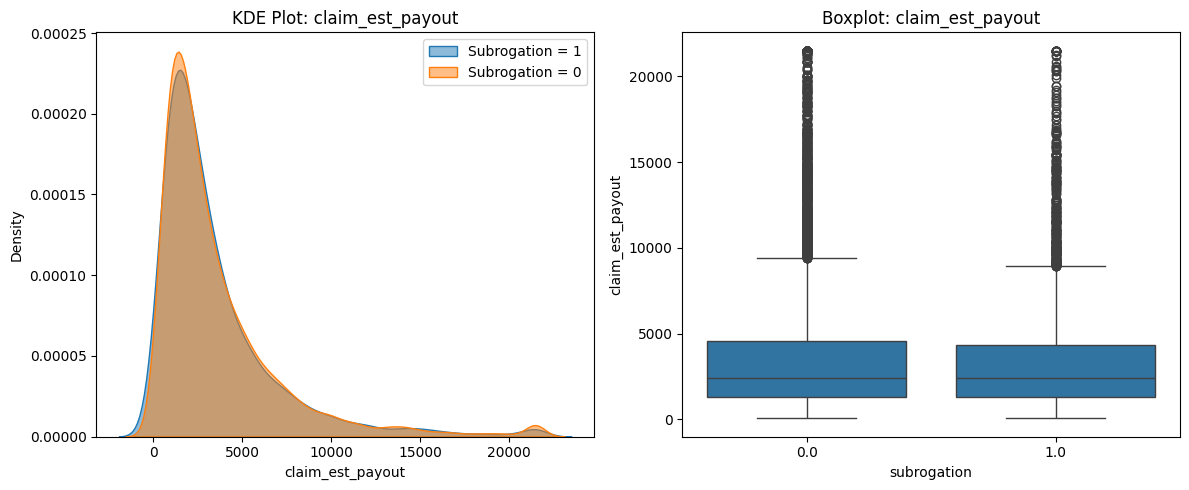

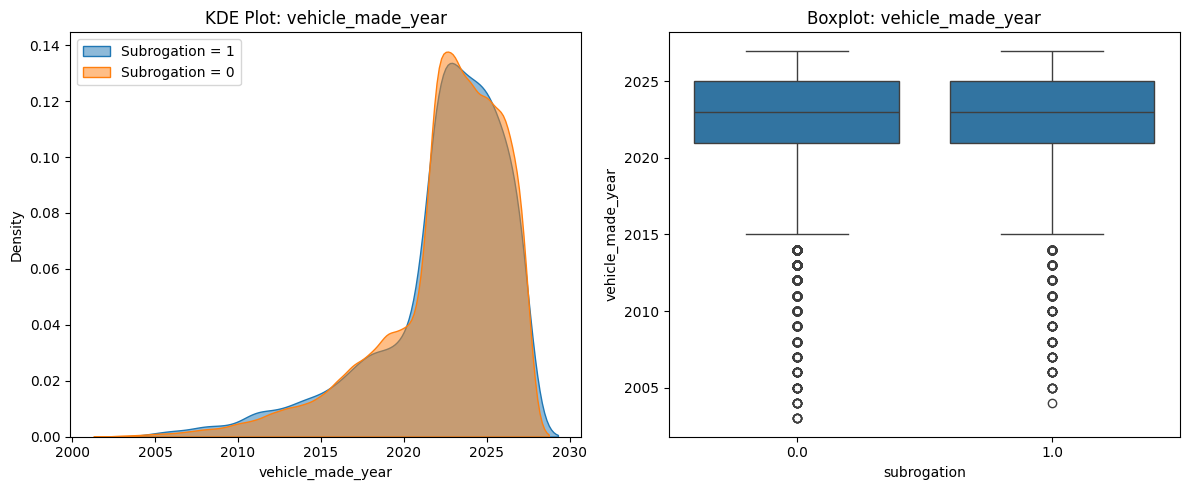

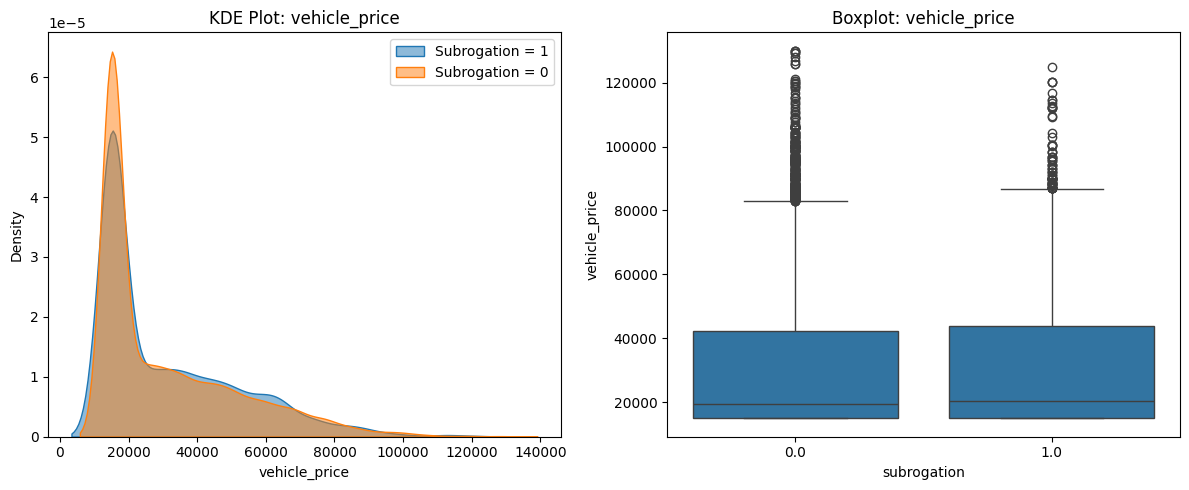

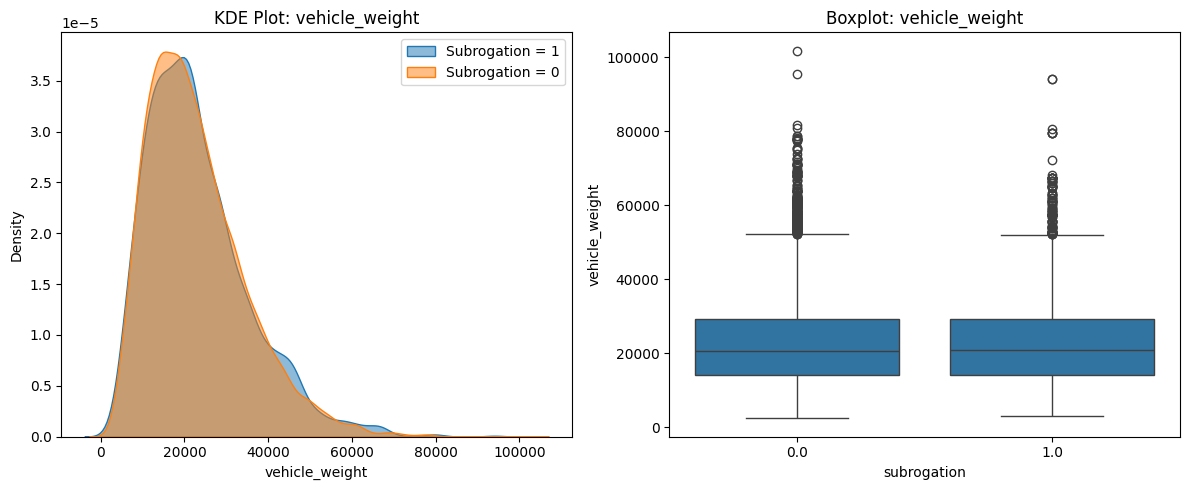

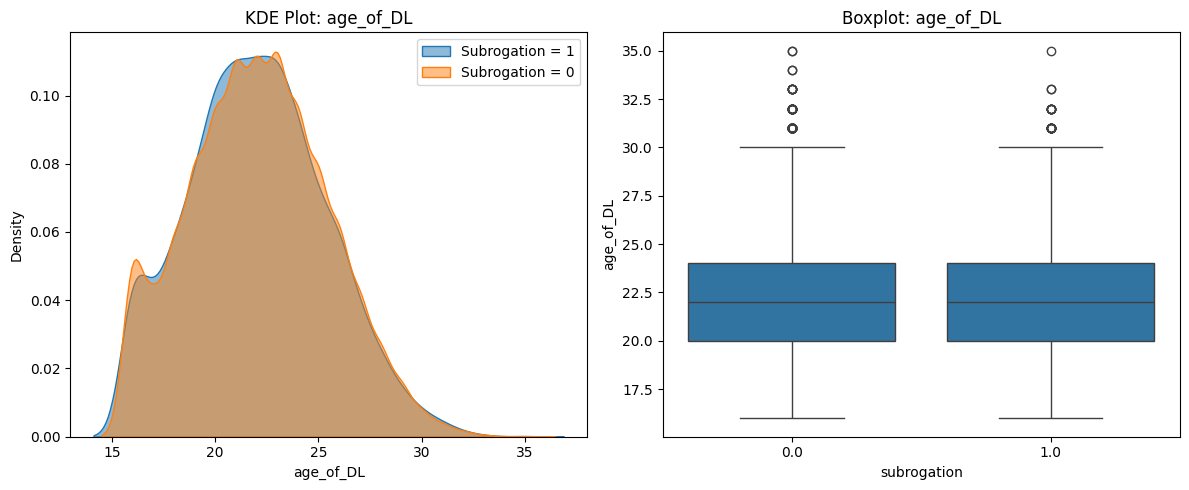

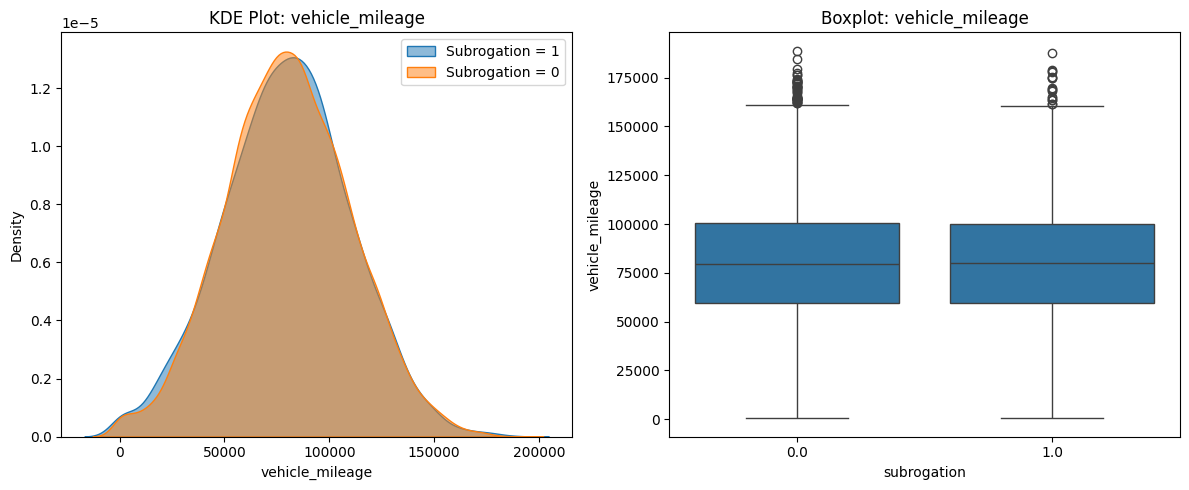

In [ ]:
for col in numerical_vars:
    plot_distribution(col)

In [ ]:
def plot_categorical(col):
    plt.figure(figsize=(10, 5))

    # proportion per category
    overall_ratio = df[col].value_counts(normalize=True)
    sub_ratio     = df_sub[col].value_counts(normalize=True)
    nosub_ratio   = df_nosub[col].value_counts(normalize=True)

    # Build a new DataFrame with groups on x-axis
    ratio_df = pd.DataFrame({
        "No Sub": nosub_ratio,
        "Sub": sub_ratio,
        "Total": overall_ratio
    }).fillna(0)

    # Transpose so x-axis = group names
    ratio_df = ratio_df.T   # rows: groups, columns: categories

    # Plot
    ratio_df.plot(kind="bar", figsize=(10, 5))
    plt.title(f"Category Proportions for: {col}")
    plt.ylabel("Proportion")
    plt.xticks(rotation=0)
    plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


<Figure size 1000x500 with 0 Axes>

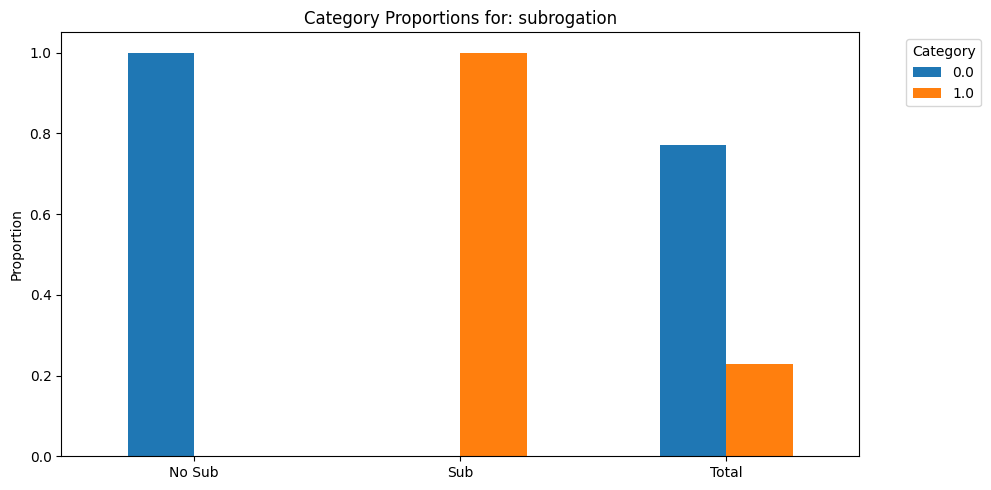

<Figure size 1000x500 with 0 Axes>

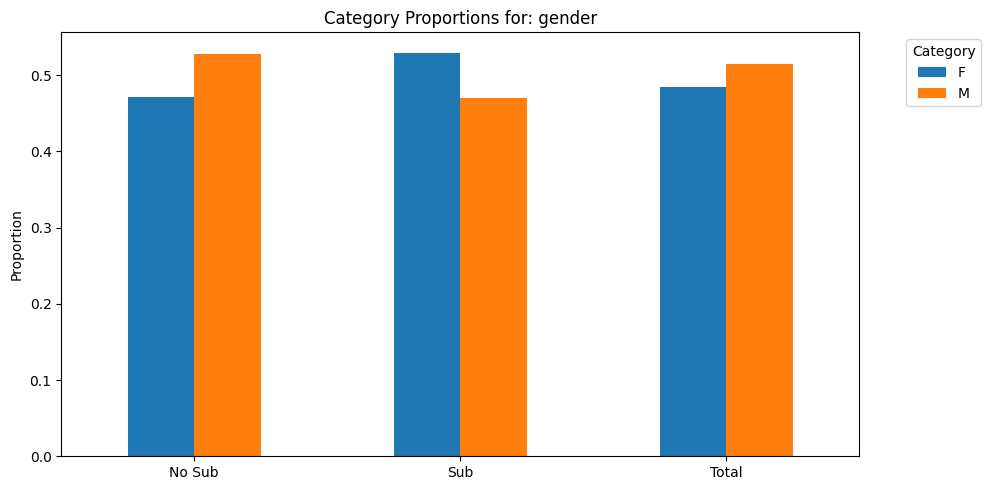

<Figure size 1000x500 with 0 Axes>

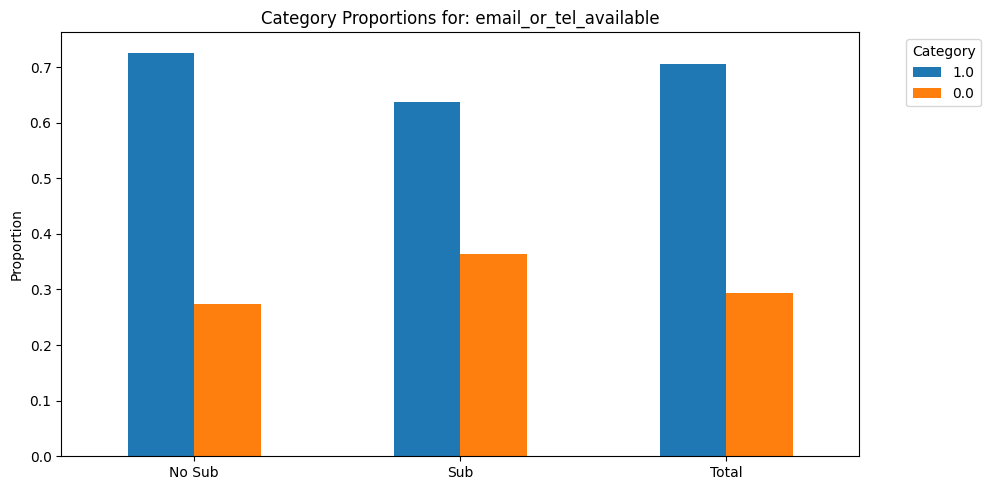

<Figure size 1000x500 with 0 Axes>

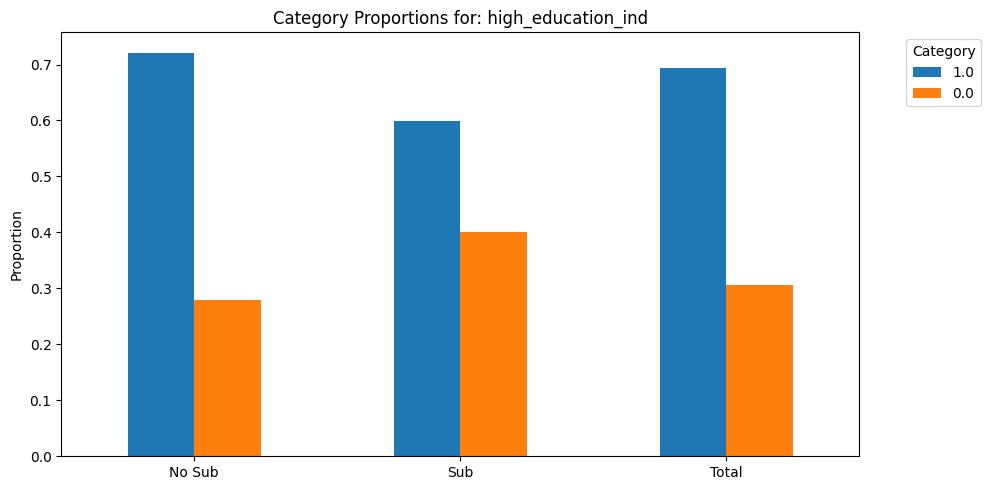

<Figure size 1000x500 with 0 Axes>

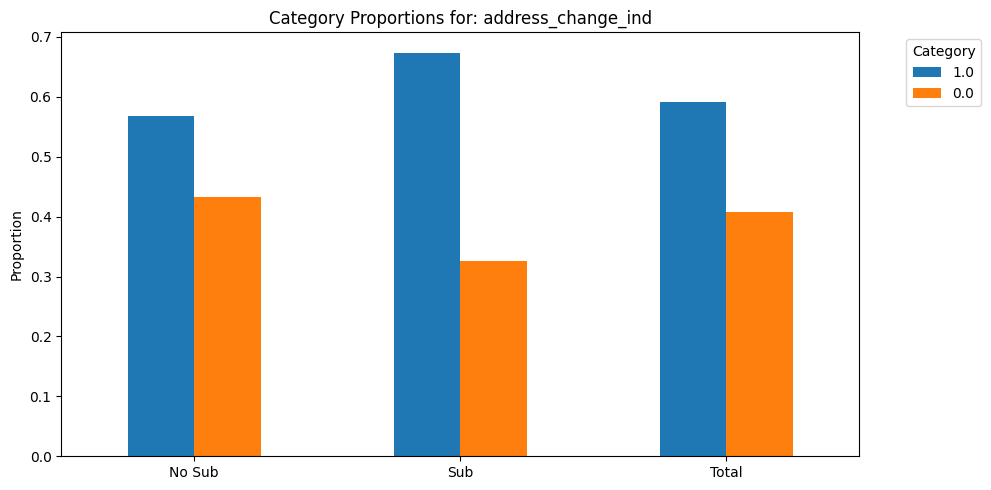

<Figure size 1000x500 with 0 Axes>

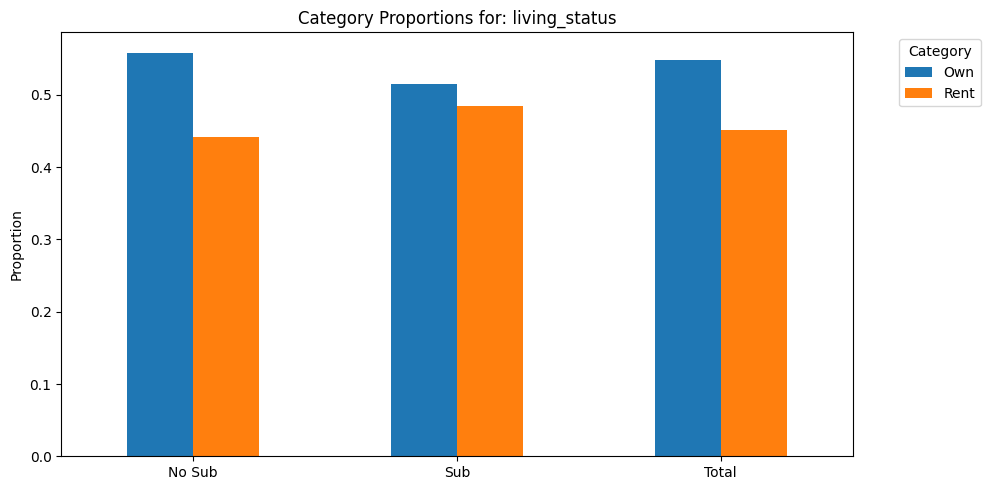

/tmp/ipython-input-2806556509.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1000x500 with 0 Axes>

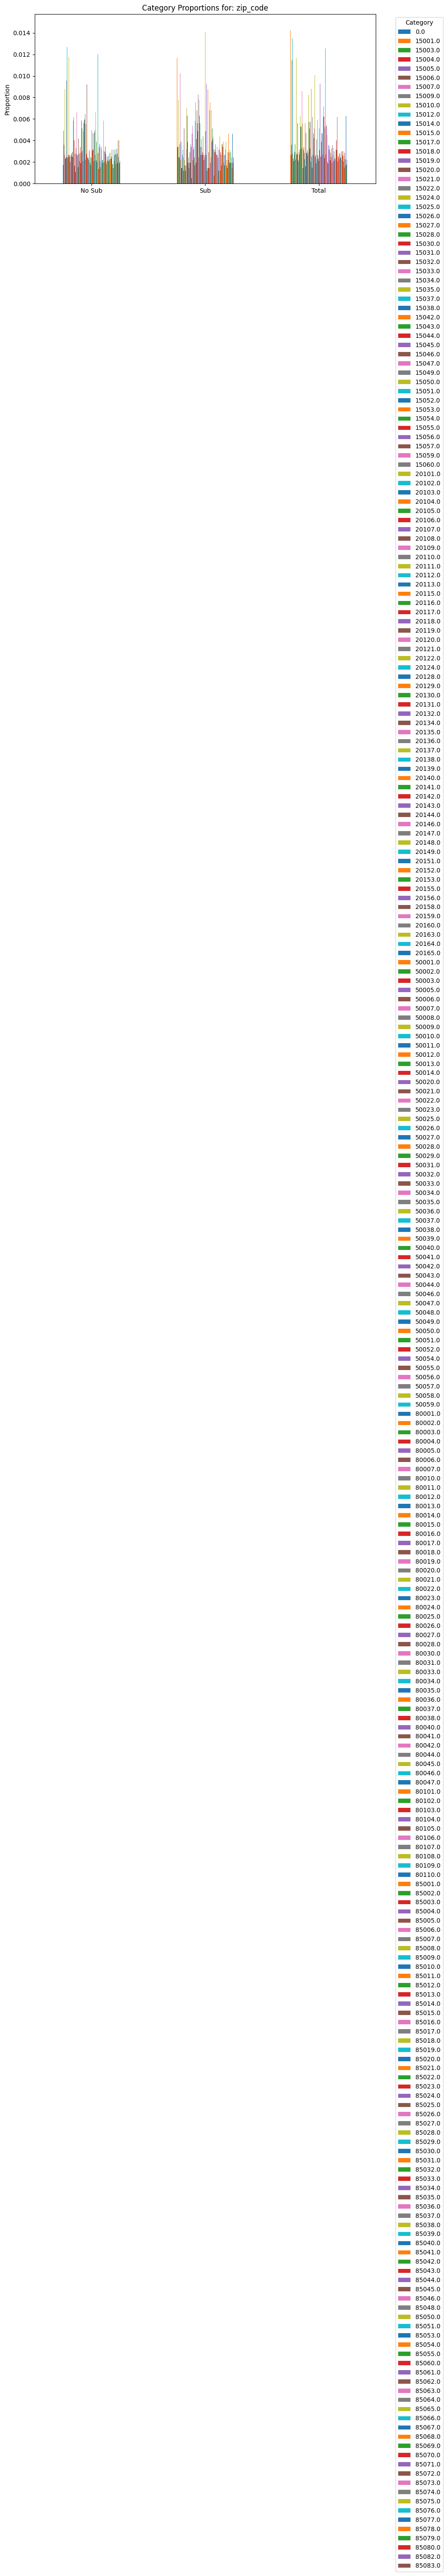

<Figure size 1000x500 with 0 Axes>

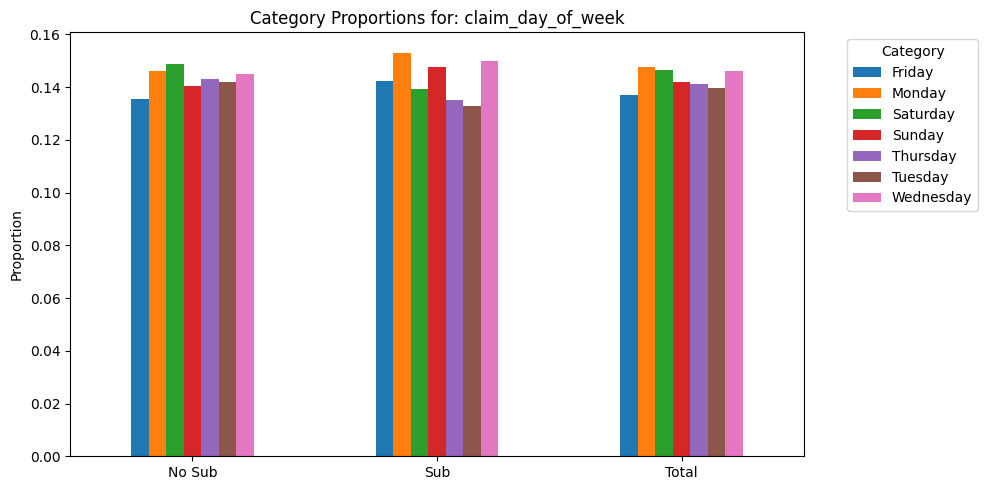

<Figure size 1000x500 with 0 Axes>

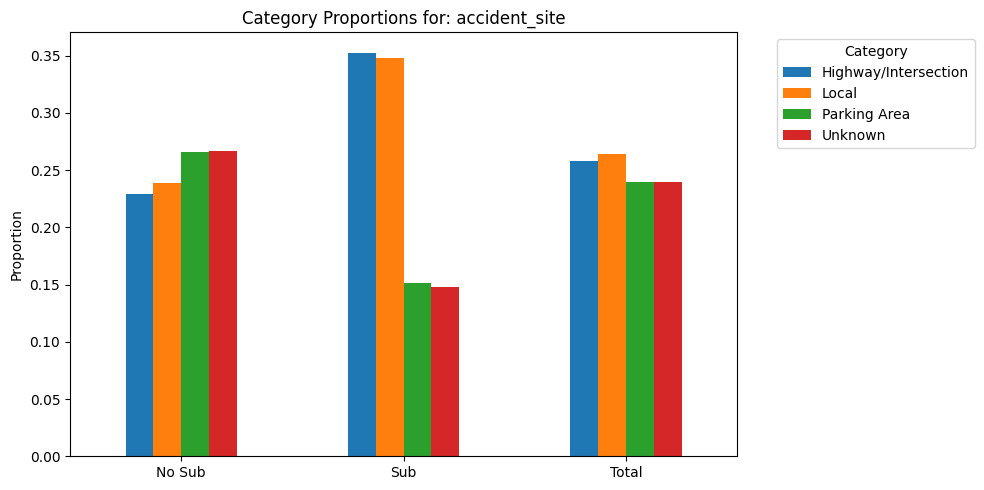

<Figure size 1000x500 with 0 Axes>

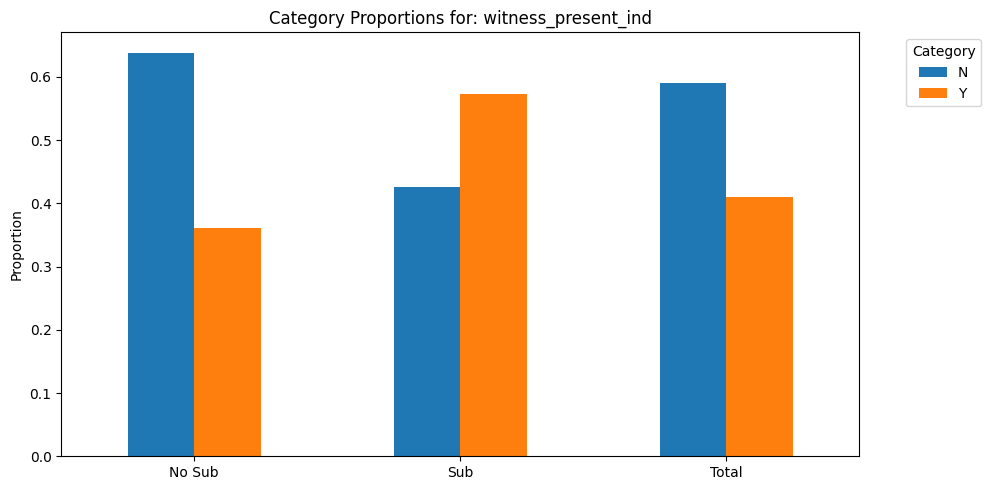

<Figure size 1000x500 with 0 Axes>

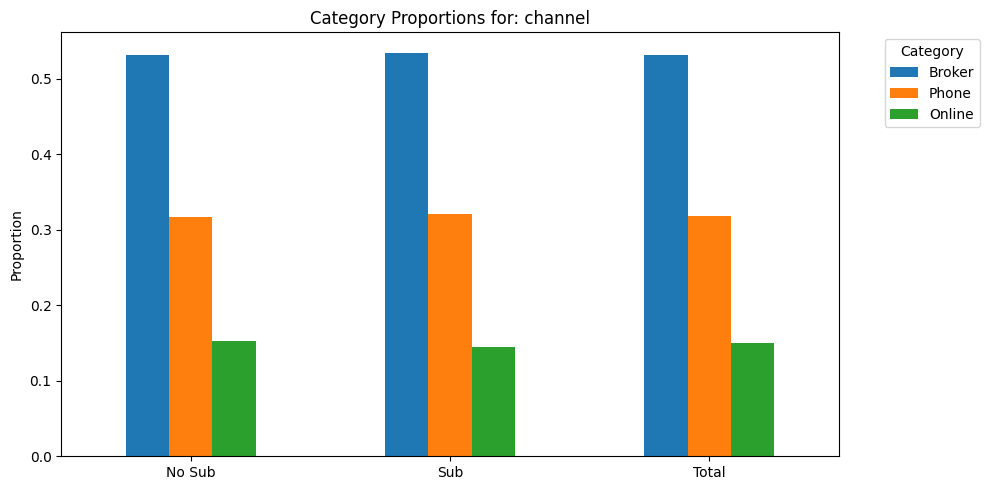

<Figure size 1000x500 with 0 Axes>

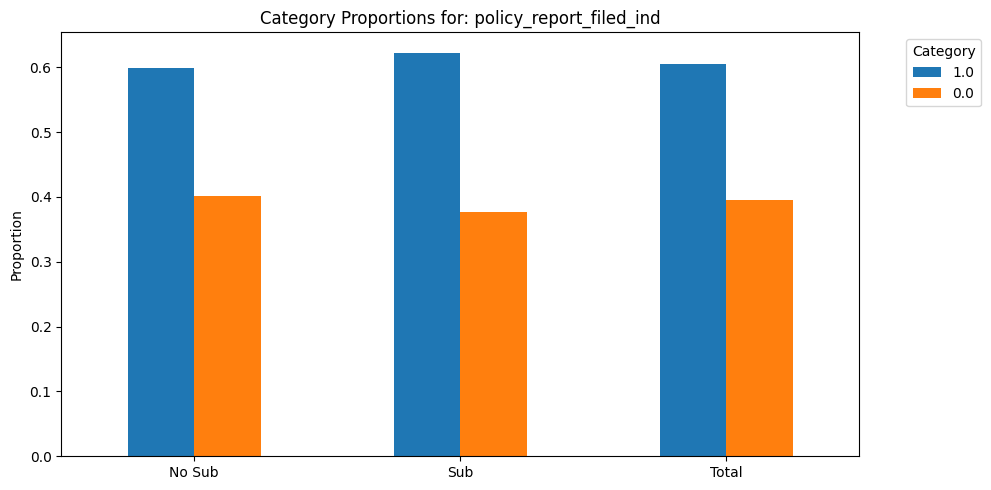

<Figure size 1000x500 with 0 Axes>

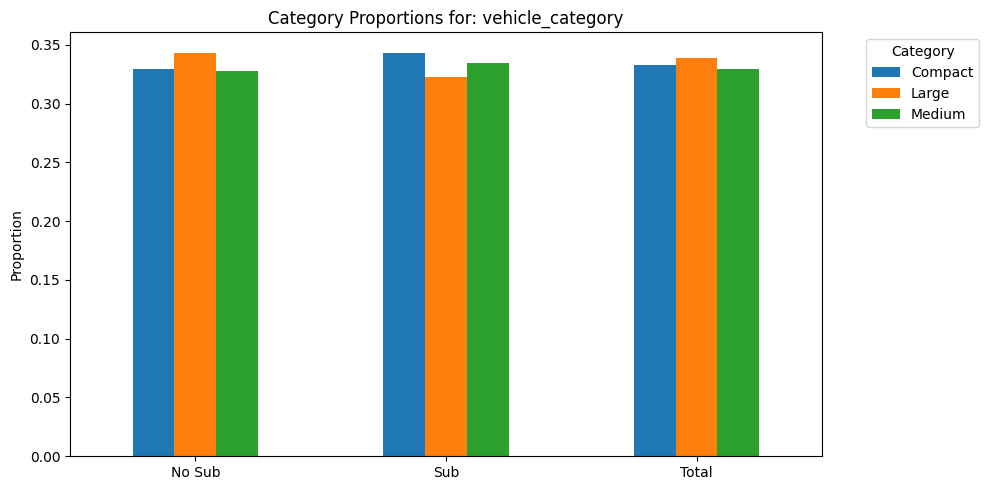

<Figure size 1000x500 with 0 Axes>

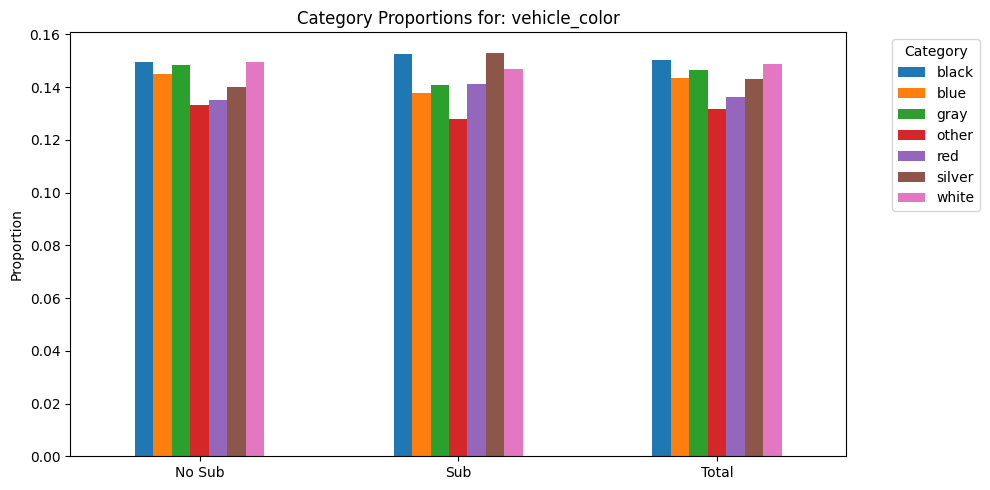

<Figure size 1000x500 with 0 Axes>

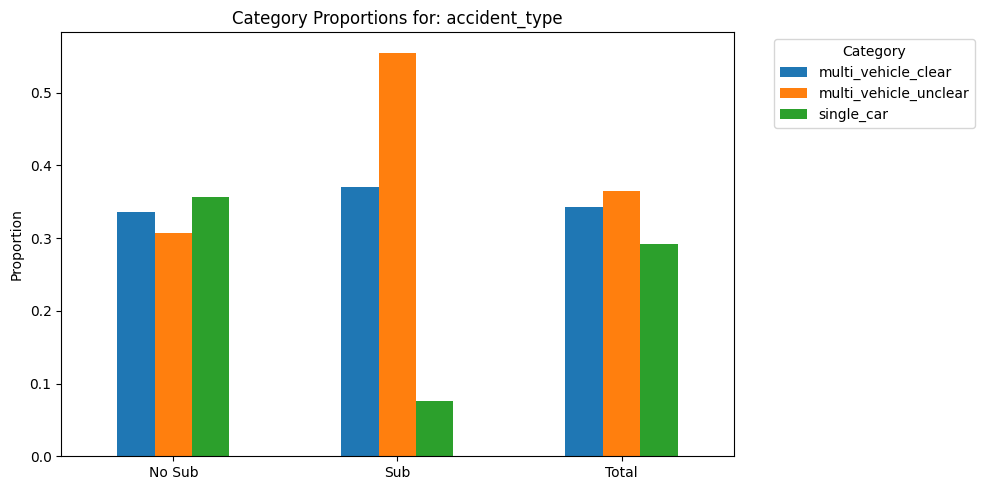

<Figure size 1000x500 with 0 Axes>

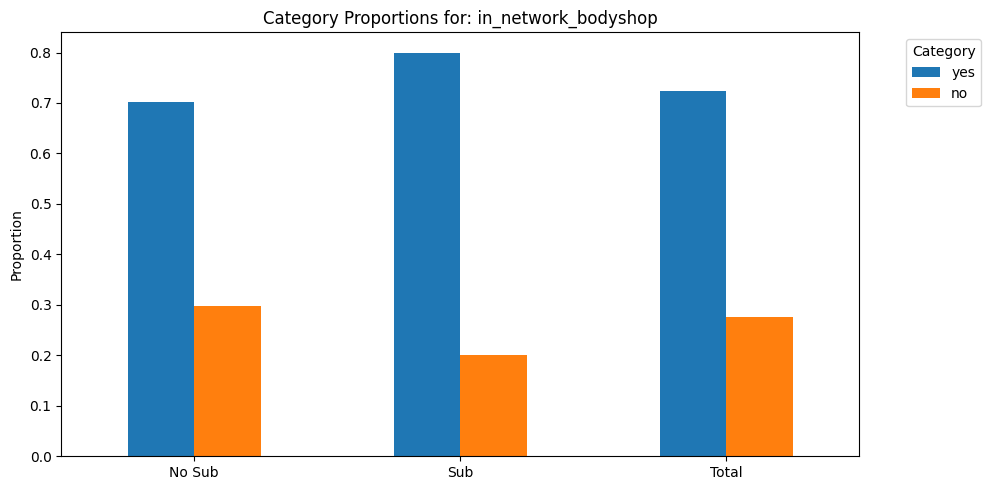

In [ ]:
for col in categorical_vars:
    plot_categorical(col)

# Meeting 1, Dec 4

## Latent Variable Salavage

## Important Predictors
- Liability Pct, Witness Present, Accident Type, Accident Location

## Zip Code
- Mapping to dense travelers area
or Mapping- State/City density



## Important Numerical Columns

### Most Important
Liab-Pct

### Maybe Important
Vehicle Price, Past number of Claims
They had a different in peak spike

## Important Categorical Columns

### Most Important
Accident cite, Witness Present, Accident type

### Maybe Important
In network body shop, living status, higher education, gender

## Complications

## The firm size matters. Why someone with great stats get a 0 for subgagrate

### Crash into someone from their own insurance.
### Crash into a family or friend
### They decide to salvage

### Auto industries can also have alliances especially smaller firms.

### 2-3 percent of auto insurance is subrogation while 15 percent if subrogation and salvage.

### Examine the zip codes for zip codes where travels insurance is high concentrated. Make those subogration 0.

### Compound variable of vehicle price to annual income and est payout

### Net Cash- Estimated payout / car value

### compound variable of estimate payout, car price, and liability percentage

### Salvage variable: Car value to estimated payout

# Exploration of the Test Set

,claim_number,year_of_born,gender,email_or_tel_available,safety_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,claim_est_payout,vehicle_made_year,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,age_of_DL,accident_type,in_network_bodyshop,vehicle_mileage
0,3126034,1987,M,0,68,30015,1,0,Own,85036,...,1373.91,2024,Compact,15000.00000,red,10960.930390,25,single_car,yes,86496
1,7380142,1987,M,1,78,30015,1,0,Rent,20148,...,733.19,2026,Compact,26970.21435,other,13006.313970,22,multi_vehicle_clear,yes,71936
2,4655051,1978,M,1,72,52206,0,1,Rent,20135,...,5885.44,2026,Large,78773.76660,white,10541.156550,24,single_car,yes,84984
3,6728725,1978,M,0,67,52292,0,1,Own,80015,...,860.31,2022,Compact,86166.37419,blue,2733.726122,21,multi_vehicle_clear,yes,51583
4,9848460,1996,M,1,81,41140,0,1,Own,85024,...,4589.91,2024,Medium,15000.00000,gray,18357.025300,18,multi_vehicle_clear,no,108488
5,7164028,1969,F,0,81,30015,1,1,Own,85004,...,5436.73,2026,Large,15000.00000,gray,40517.832780,20,single_car,yes,25078
6,8693447,1986,F,1,54,90753,1,1,Own,85021,...,20159.13,2022,Compact,56195.15114,blue,19559.515730,20,multi_vehicle_unclear,yes,39749
7,3185825,1975,M,1,80,76296,1,1,Own,85082,...,1310.06,2024,Compact,36823.01830,red,24992.982850,20,single_car,no,91793
8,4469488,1953,M,0,75,48043,0,0,Rent,20149,...,2554.07,2018,Medium,53538.80249,red,23578.633460,22,multi_vehicle_clear,no,76761
9,6027831,1985,M,1,100,99216,1,1,Rent,20115,...,2305.88,2027,Medium,57750.07688,red,16904.430160,18,multi_vehicle_unclear,yes,105122


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution_test(col):
    plt.figure(figsize=(12, 5))

    # KDE plot
    plt.subplot(1, 2, 1)
    sns.kdeplot(df_test[col], label="Test_Data = 1", fill=True, alpha=0.5)
    sns.kdeplot(df[col], label="Test_Data = 0", fill=True, alpha=0.5)
    plt.title(f"KDE Plot: {col}")
    plt.legend()
    plt.show()

In [ ]:
for col in numerical_vars:
    print("=" * 70)
    print(f"🔹 Numerical Column: {col}\n")

    print("📌 Train Data (df_test)")
    print(df_test[col].describe())
    print()

    print("📌 Subrogation = 0 (df_train)")
    print(df[col].describe())
    print()


🔹 Numerical Column: year_of_born

📌 Train Data (df_test)
count    12000.000000
mean      1980.932000
std         11.830499
min       1929.000000
25%       1973.000000
50%       1982.000000
75%       1990.000000
max       2009.000000
Name: year_of_born, dtype: float64

📌 Subrogation = 0 (df_train)
count    18000.000000
mean      1980.770500
std         12.198355
min       1774.000000
25%       1973.000000
50%       1982.000000
75%       1990.000000
max       2008.000000
Name: year_of_born, dtype: float64

🔹 Numerical Column: safety_rating

📌 Train Data (df_test)
count    12000.000000
mean        74.615917
std         14.330958
min         18.000000
25%         65.000000
50%         75.000000
75%         85.000000
max        100.000000
Name: safety_rating, dtype: float64

📌 Subrogation = 0 (df_train)
count    18000.000000
mean        74.641833
std         14.566564
min          2.000000
25%         65.000000
50%         75.000000
75%         85.000000
max        100.000000
Name: safety_r

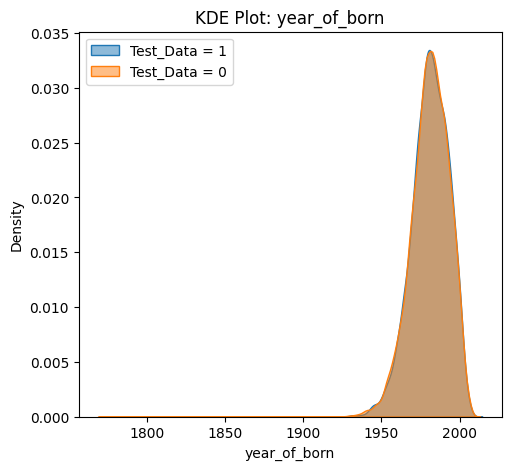

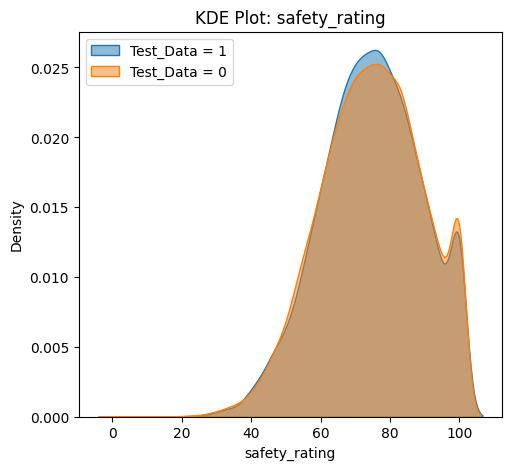

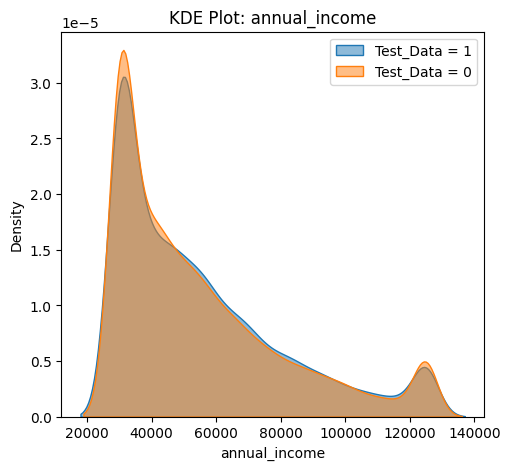

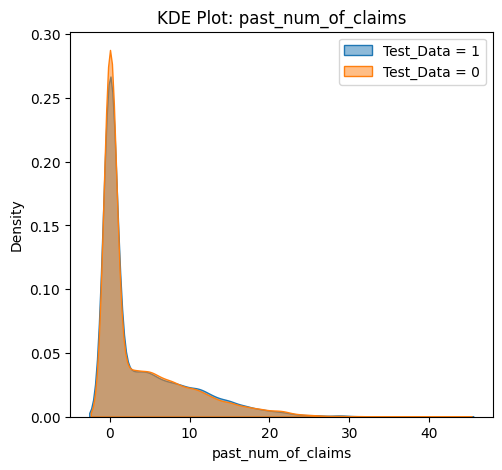

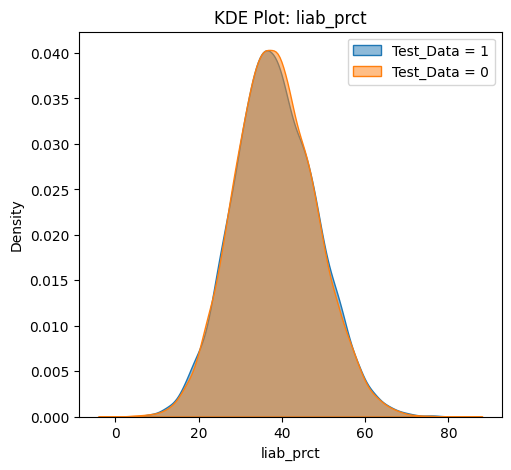

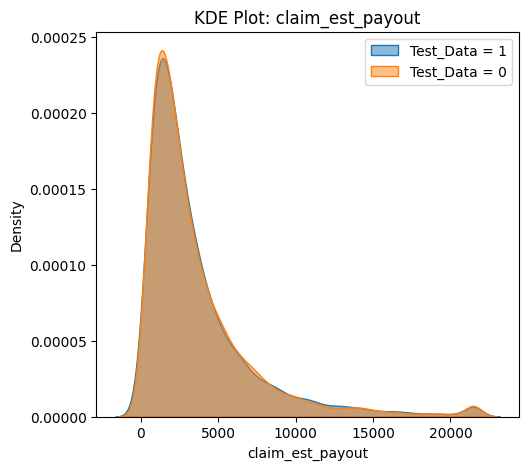

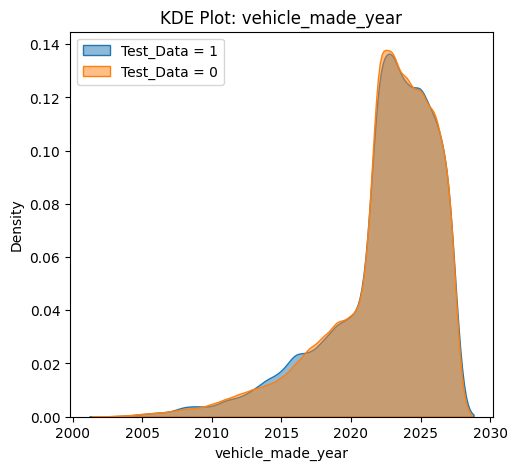

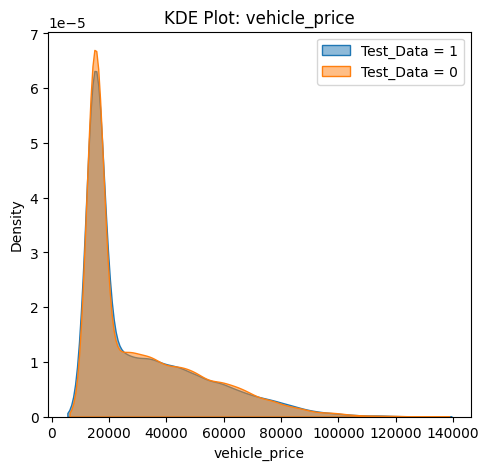

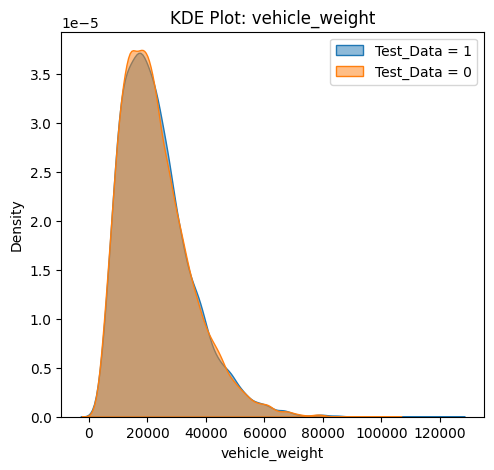

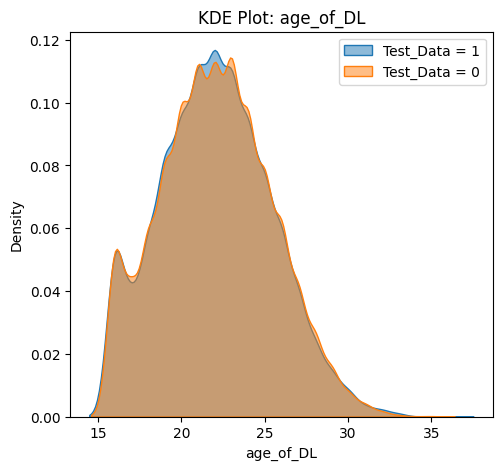

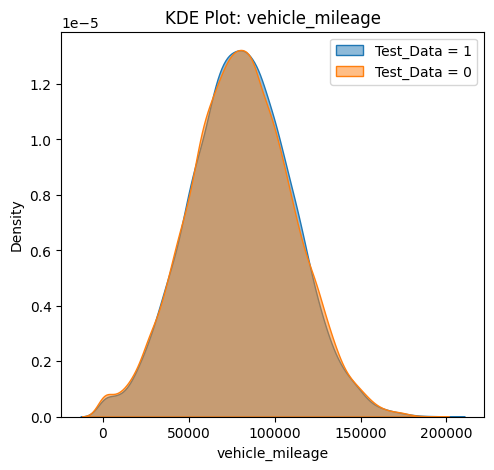

In [ ]:
for col in numerical_vars:
    plot_distribution_test(col)

In [ ]:
for col in categorical_vars:
    print("=" * 60)
    print(f"🔹 Column: {col}\n")

    # Value counts (absolute counts)
    sub_counts = df_test[col].value_counts(dropna=False)
    total_counts = df[col].value_counts(dropna=False)

    # Ratios (percentage of total)
    test_ratio = sub_counts / len(df_test)
    total_ratio = total_counts / len(df)

    # Print results

    print("📌 Subrogation = 1")
    print(pd.DataFrame({"count": sub_counts, "ratio": test_ratio.round(3)}))
    print()


    print("📌 Total")
    print(pd.DataFrame({"count": total_counts, "ratio": total_ratio.round(3)}))
    print("=" * 60)
    print()


🔹 Column: gender

📌 Subrogation = 1
        count  ratio
gender              
M        6264  0.522
F        5736  0.478

📌 Total
        count  ratio
gender              
M        9273  0.515
F        8727  0.485
NaN         1  0.000

🔹 Column: email_or_tel_available

📌 Subrogation = 1
                        count  ratio
email_or_tel_available              
1                        8491  0.708
0                        3509  0.292

📌 Total
                        count  ratio
email_or_tel_available              
1.0                     12705  0.706
0.0                      5295  0.294
NaN                         1  0.000

🔹 Column: high_education_ind

📌 Subrogation = 1
                    count  ratio
high_education_ind              
1                    8330  0.694
0                    3670  0.306

📌 Total
                    count  ratio
high_education_ind              
1.0                 12482  0.693
0.0                  5518  0.307
NaN                     1  0.000

🔹 Column: addre

In [ ]:
def plot_categorical_test(col):
    plt.figure(figsize=(10, 5))

    # proportion per category
    overall_ratio = df[col].value_counts(normalize=True)
    sub_ratio     = df_test[col].value_counts(normalize=True)

    # Build a new DataFrame with groups on x-axis
    ratio_df = pd.DataFrame({
        "Test": sub_ratio,
        "Total": overall_ratio
    }).fillna(0)

    # Transpose so x-axis = group names
    ratio_df = ratio_df.T   # rows: groups, columns: categories

    # Plot
    ratio_df.plot(kind="bar", figsize=(10, 5))
    plt.title(f"Category Proportions for: {col}")
    plt.ylabel("Proportion")
    plt.xticks(rotation=0)
    plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


<Figure size 1000x500 with 0 Axes>

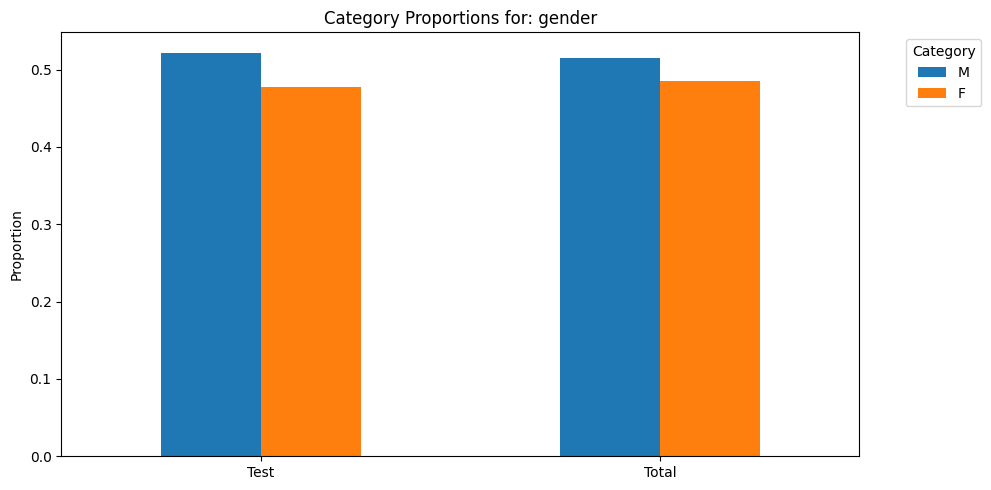

<Figure size 1000x500 with 0 Axes>

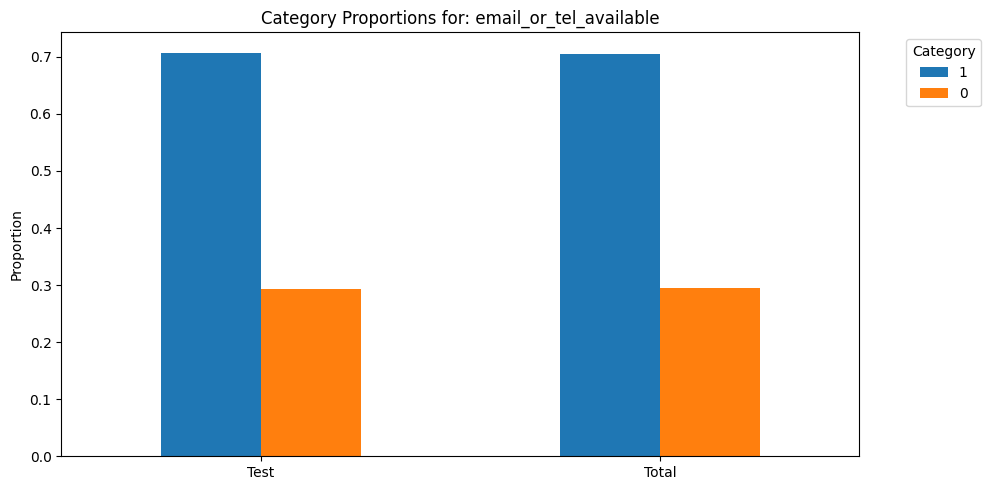

<Figure size 1000x500 with 0 Axes>

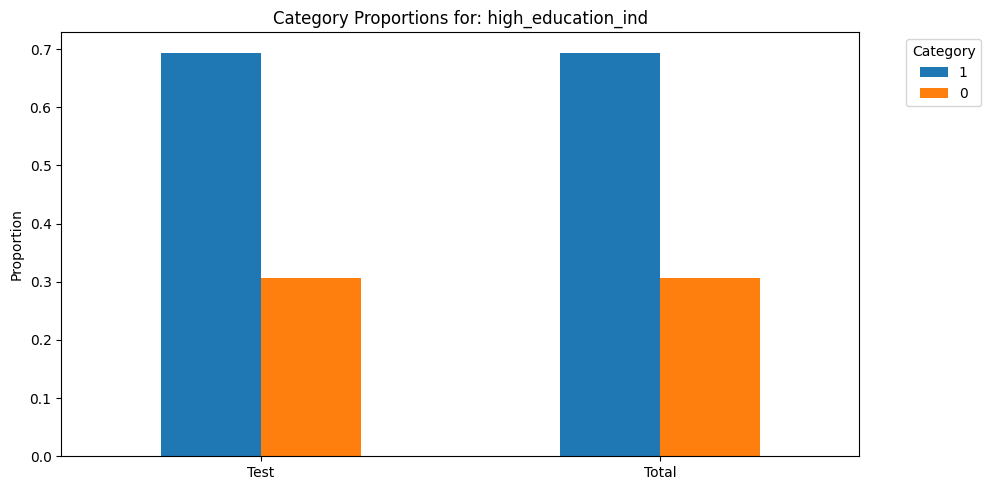

<Figure size 1000x500 with 0 Axes>

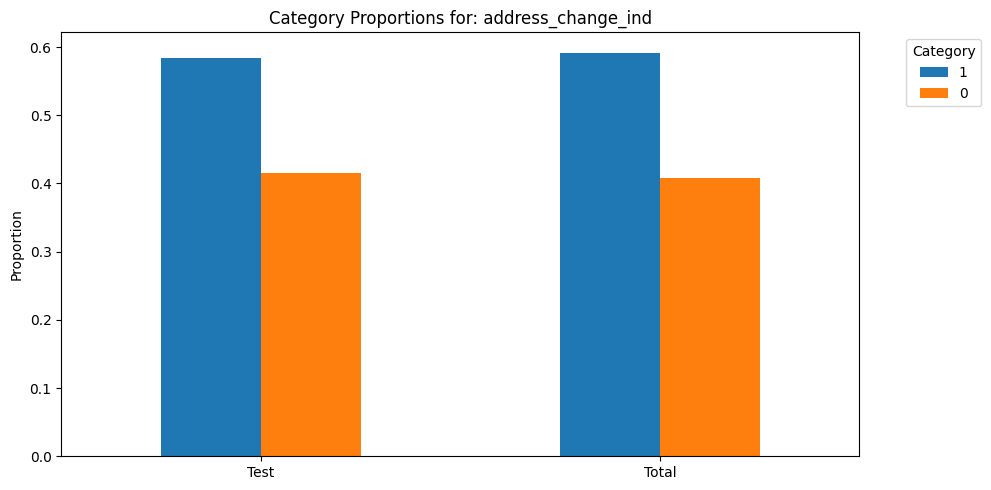

<Figure size 1000x500 with 0 Axes>

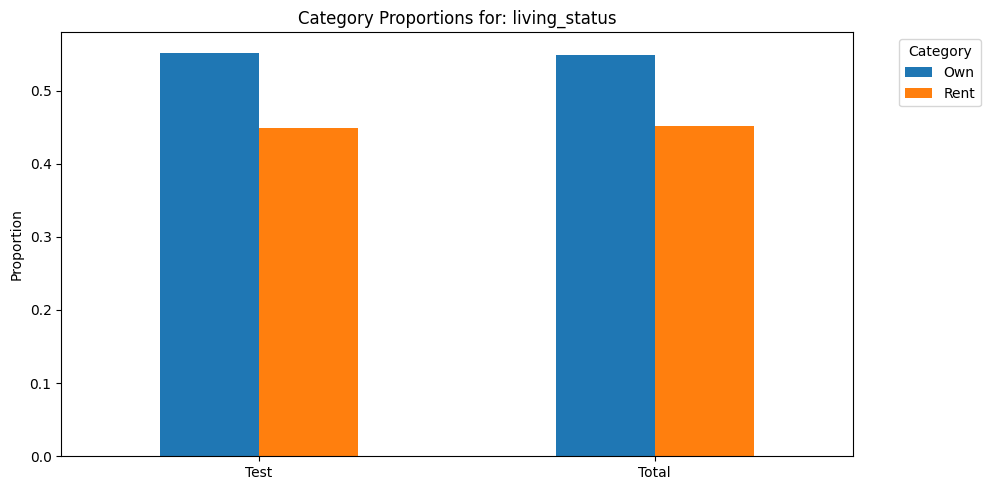

/tmp/ipython-input-227570153.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1000x500 with 0 Axes>

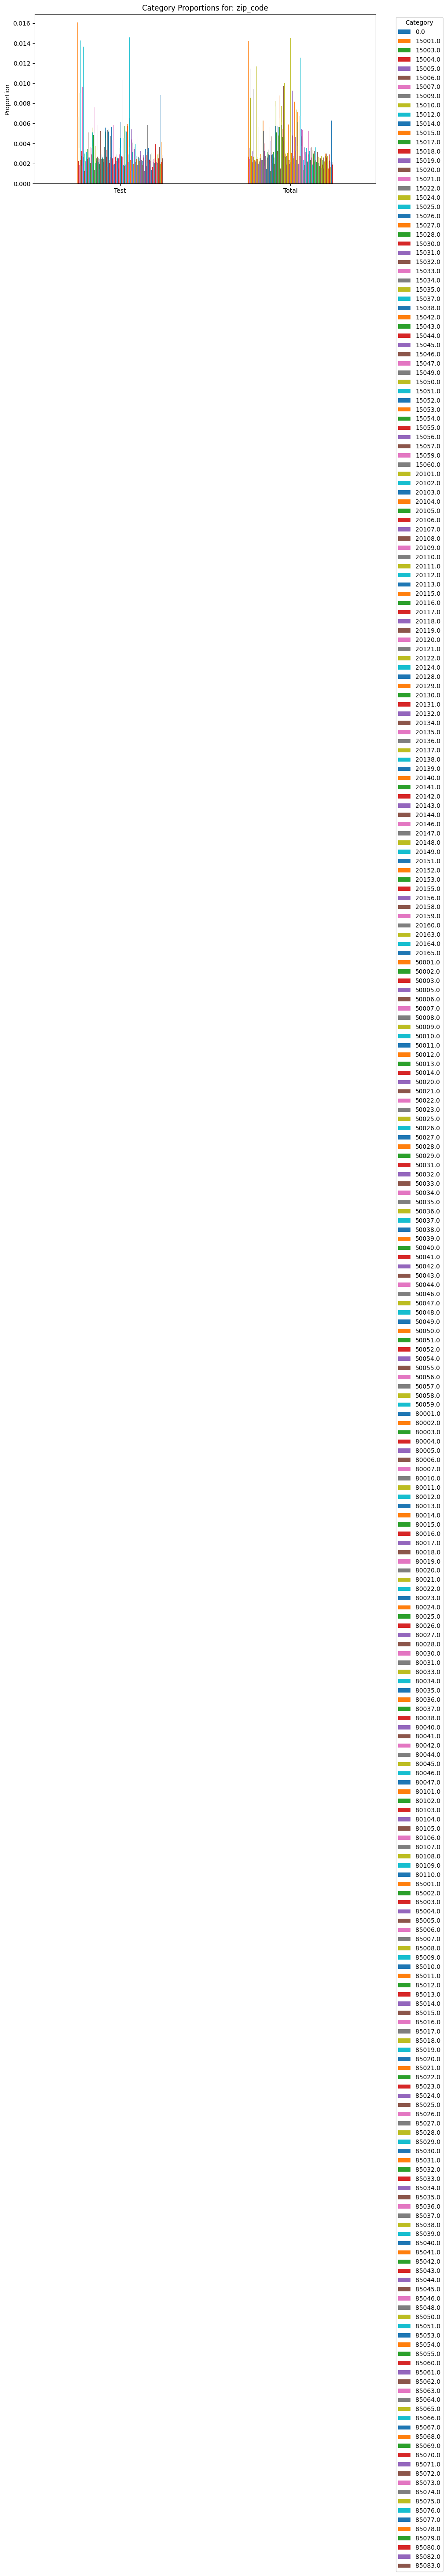

<Figure size 1000x500 with 0 Axes>

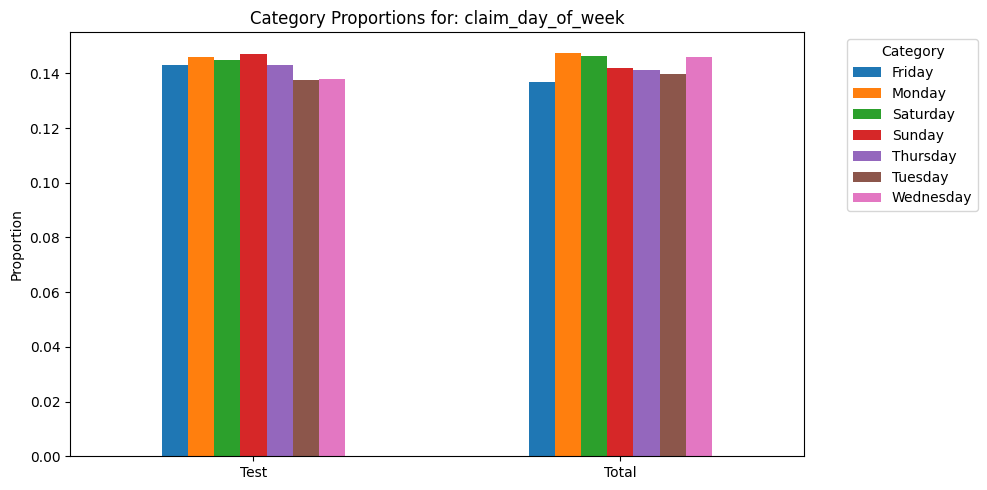

<Figure size 1000x500 with 0 Axes>

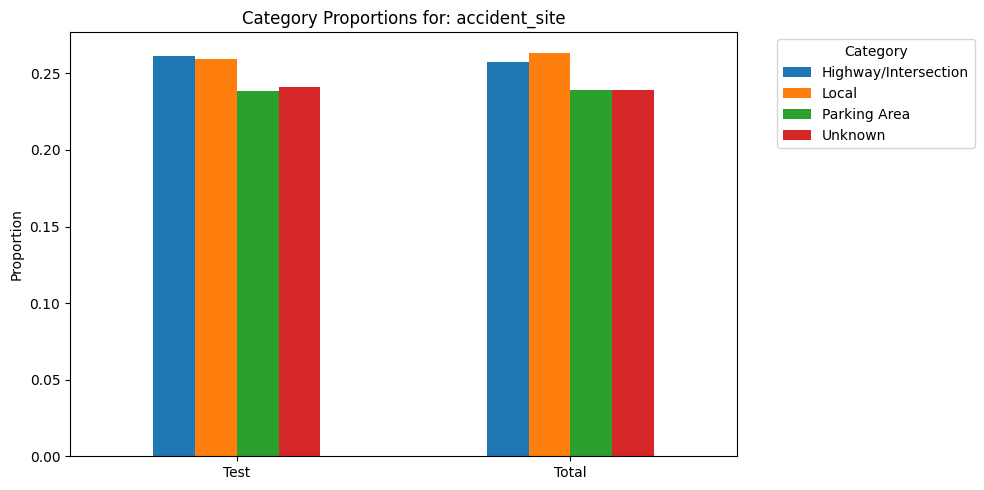

<Figure size 1000x500 with 0 Axes>

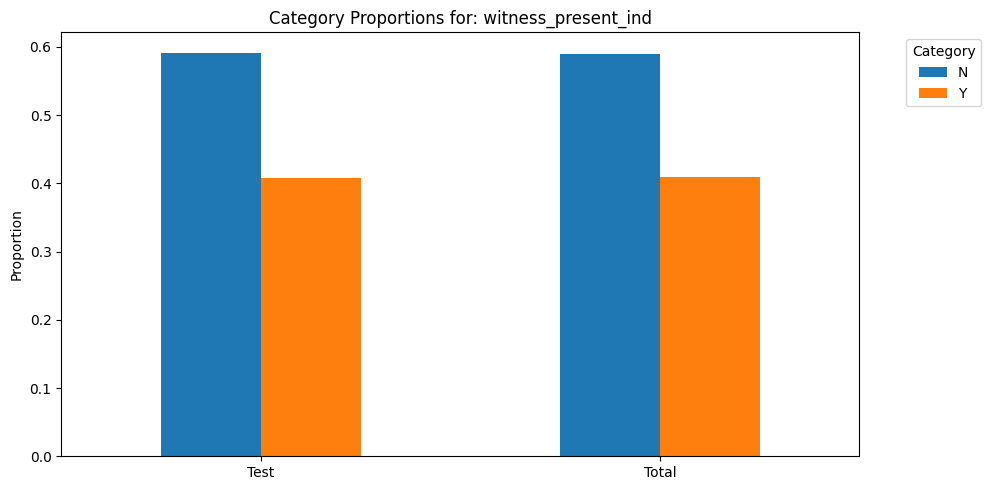

<Figure size 1000x500 with 0 Axes>

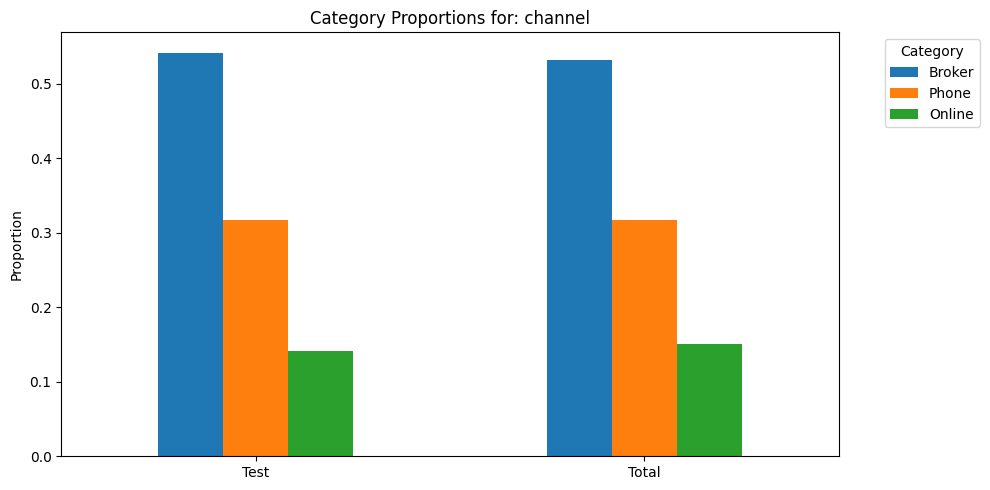

<Figure size 1000x500 with 0 Axes>

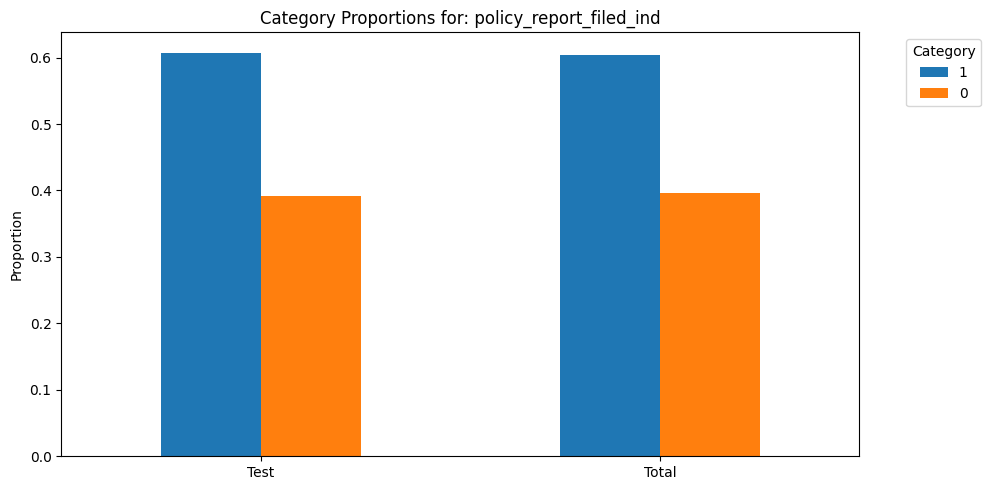

<Figure size 1000x500 with 0 Axes>

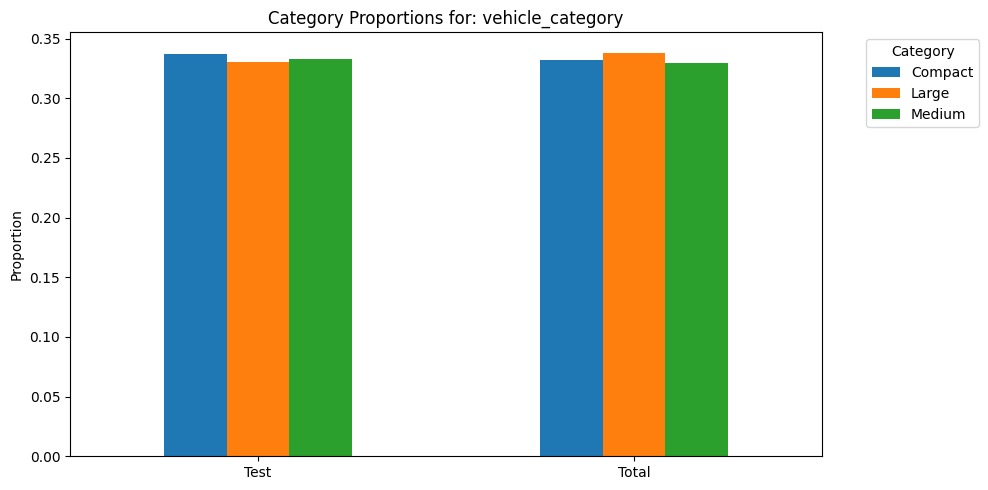

<Figure size 1000x500 with 0 Axes>

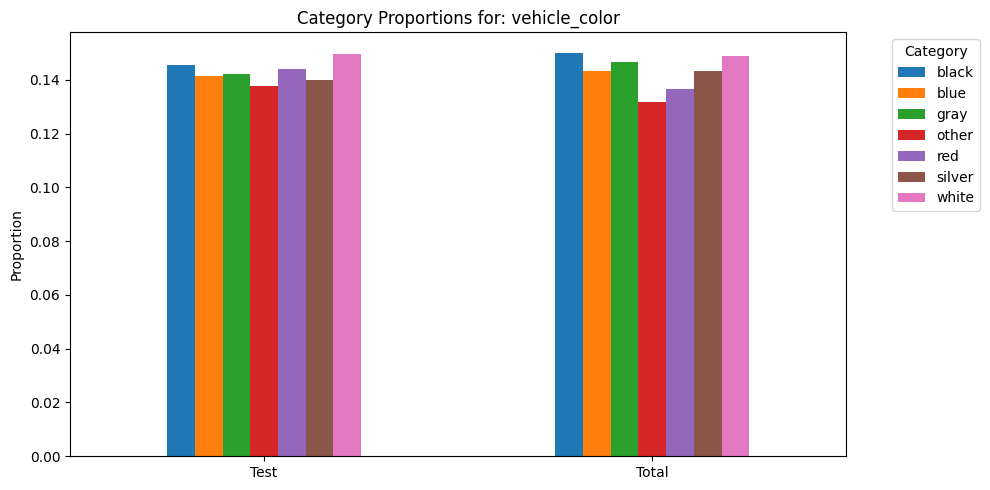

<Figure size 1000x500 with 0 Axes>

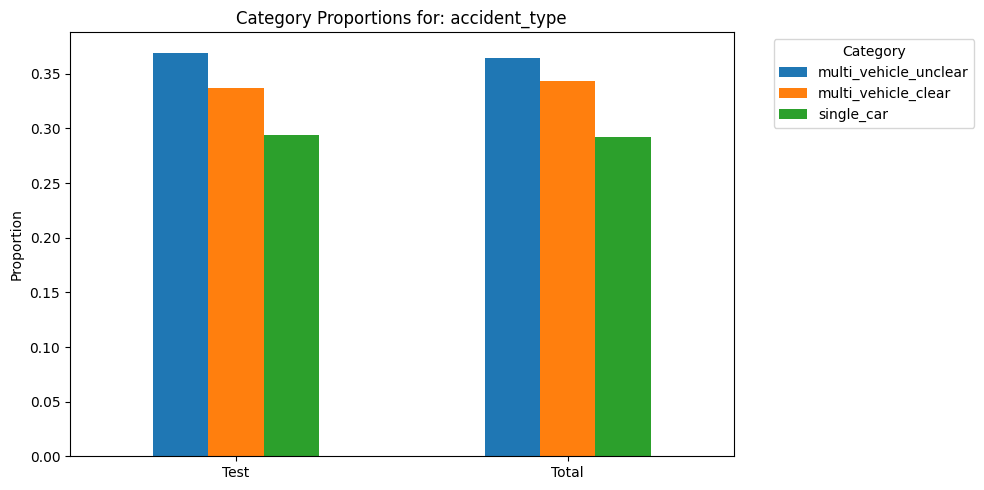

<Figure size 1000x500 with 0 Axes>

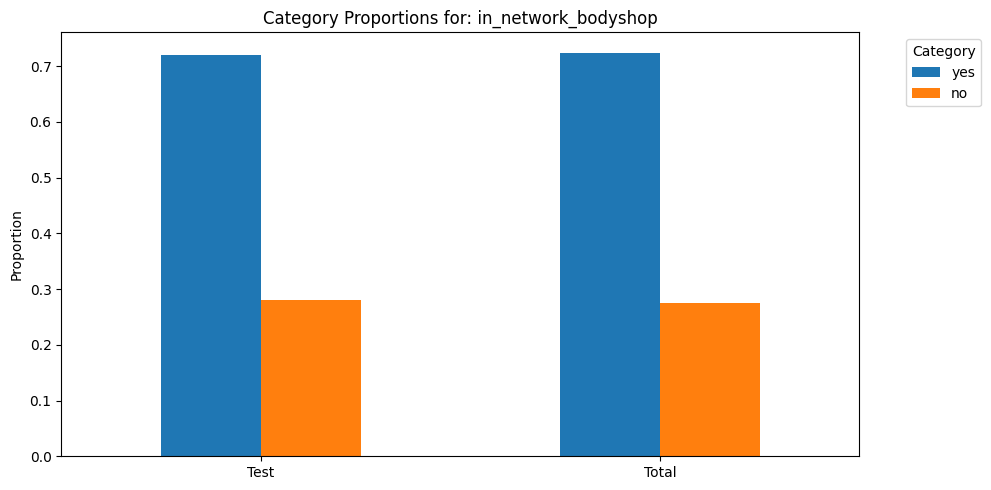

In [ ]:
for col in categorical_vars:
    plot_categorical_test(col)

# Exploration of Interaction Variables


In [ ]:
df['pay_v_price'] = df['claim_est_payout'] - df['vehicle_price']
df['pay_v_price_ratio'] = df['claim_est_payout'] / df['vehicle_price']



In [7]:
df_sub = df[df['subrogation'] == 1].copy()
df_nosub = df[df['subrogation'] == 0].copy()


df_nosub['pay_v_price'] = df_nosub['vehicle_price'] - df_nosub['claim_est_payout']
df_nosub['pay_v_price_ratio'] = df_nosub['claim_est_payout'] / df_nosub['vehicle_price']
df_nosub['liab_v_price'] = (df_nosub['liab_prct']) * df_nosub['vehicle_price']
df_nosub['liab_v_pay_v_price'] = (df_nosub['liab_prct']) * df_nosub['pay_v_price']
df_nosub['liab_v_pay'] = (df_nosub['liab_prct']) * df_nosub['claim_est_payout']
df_nosub['liab_v_pay_price'] = (df_nosub['liab_prct']) * df_nosub['claim_est_payout'] * df_nosub['vehicle_price']
df_sub['pay_v_price'] = df_sub['vehicle_price'] - df_sub['claim_est_payout']
df_sub['pay_v_price_ratio'] = df_sub['claim_est_payout'] / df_sub['vehicle_price']
df_sub['liab_v_price'] = (df_sub['liab_prct']) * df_sub['vehicle_price']
df_sub['liab_v_pay_v_price'] = (df_sub['liab_prct']) * df_sub['pay_v_price']
df_sub['liab_v_pay'] = (df_sub['liab_prct']) * df_sub['claim_est_payout']
df_sub['liab_v_pay_price'] = (df_sub['liab_prct']) * df_sub['claim_est_payout'] * df_sub['vehicle_price']

new_cols = ['pay_v_price', 'pay_v_price_ratio', 'liab_v_price', 'liab_v_pay_v_price', 'liab_v_pay', 'liab_v_pay_price']


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution_test(col):
    plt.figure(figsize=(12, 5))

    # KDE plot
    plt.subplot(1, 2, 1)
    sns.kdeplot(df_sub[col], label=" Subgogration= 1", fill=True, alpha=0.5)
    sns.kdeplot(df_nosub[col], label="Subgogration = 0", fill=True, alpha=0.5)
    plt.title(f"KDE Plot: {col}")
    plt.legend()
    plt.show()

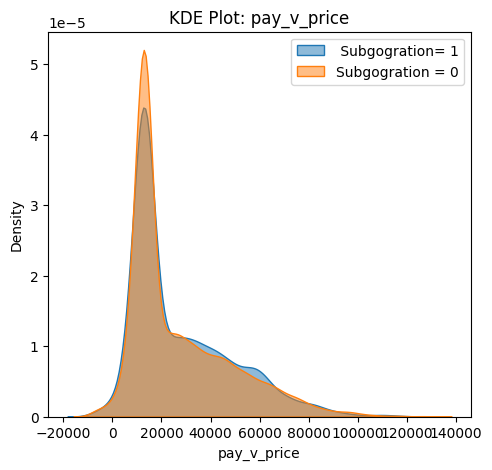

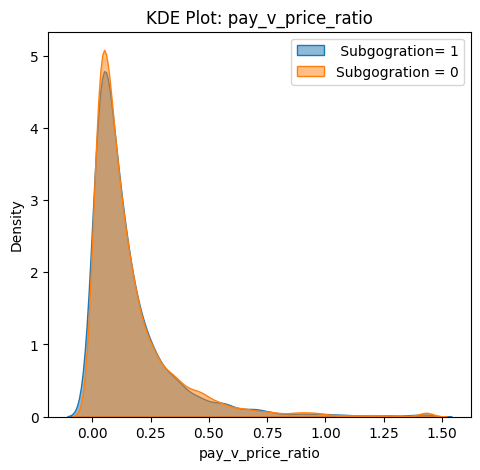

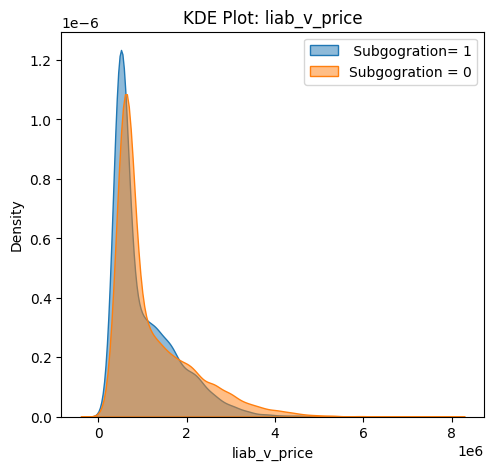

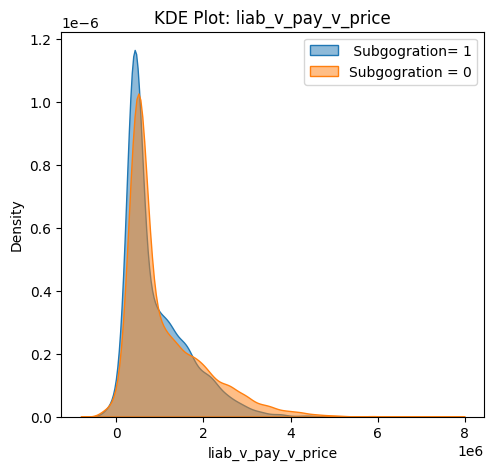

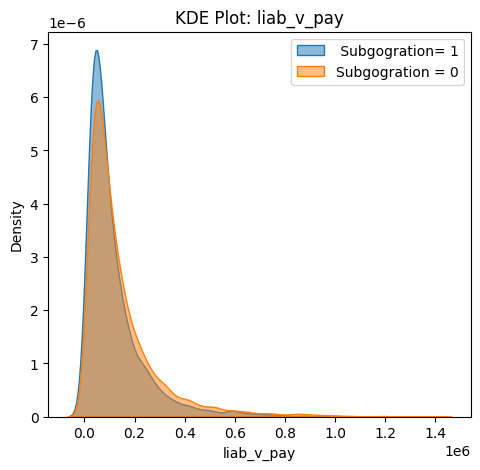

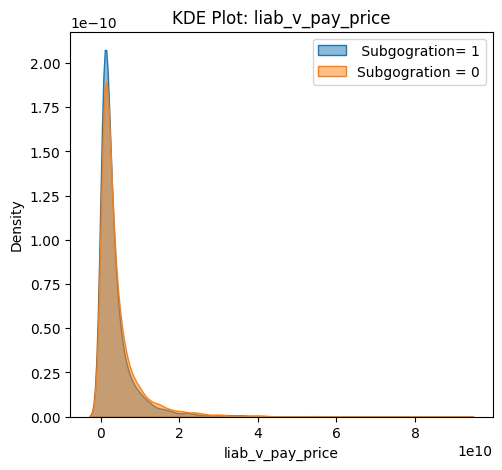

In [9]:
for col in new_cols:
  plot_distribution_test(col)

# Baseline Code

In [283]:
df['subrogation'].info()
df['liab_v_price'] = df['liab_prct'] * df['vehicle_price']
df['liab_v_pay'] = df['liab_prct'] * df['claim_est_payout']
df['pay_v_price'] = df['vehicle_price'] - df['claim_est_payout']
df['liab_v_pay_v_price'] = df['liab_prct'] * df['pay_v_price']

df_test['liab_v_price'] = df_test['liab_prct'] * df_test['vehicle_price']
df_test['liab_v_pay'] = df_test['liab_prct'] * df_test['claim_est_payout']
df_test['pay_v_price'] = df_test['vehicle_price'] - df_test['claim_est_payout']
df_test['liab_v_pay_v_price'] = df_test['liab_prct'] * df_test['pay_v_price']

<class 'pandas.core.series.Series'>
RangeIndex: 18001 entries, 0 to 18000
Series name: subrogation
Non-Null Count  Dtype  
--------------  -----  
17999 non-null  float64
dtypes: float64(1)
memory usage: 140.8 KB


In [284]:
categorical_vars = [
    "gender",
    "email_or_tel_available",
    "high_education_ind",
    "address_change_ind",
    "living_status",
    "zip_code",
    "claim_day_of_week",
    "accident_site",
    "witness_present_ind",
    "channel",
    "policy_report_filed_ind",
    "vehicle_category",
    "vehicle_color",
    "accident_type",
    "in_network_bodyshop"
]

numerical_vars = [
    "year_of_born",
    "safety_rating",
    "annual_income",
    "past_num_of_claims",
    "liab_prct",
    "claim_est_payout",
    "vehicle_made_year",
    "vehicle_price",
    "vehicle_weight",
    "age_of_DL",
    "vehicle_mileage",
    'liab_v_price',
    'liab_v_pay',
    'liab_v_pay_v_price',
    'pay_v_price'
]
numerical_predictors_backup = ['liab_prct', 'liab_v_price', 'liab_v_pay', 'liab_v_pay_v_price']
numerical_predictors = ['liab_prct', 'liab_v_pay' ]
categorical_predictors = ['witness_present_ind', 'accident_site' , 'accident_type', "gender"]
predictors = numerical_predictors + categorical_predictors

## Produce Results with different Methods

In [285]:
random_state = 42
methods = {
    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        class_weight="balanced"  # often helps with F1
    ),

    "Random Forest": RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        random_state=random_state,
        n_jobs=-1,
        class_weight="balanced_subsample"
    ),

    "Extra Trees": ExtraTreesClassifier(
        n_estimators=300,
        random_state=random_state,
        n_jobs=-1,
        class_weight="balanced_subsample"
    ),

    "Gradient Boosting": GradientBoostingClassifier(
        random_state=random_state
    ),

    "HistGradientBoosting": HistGradientBoostingClassifier(
        random_state=random_state
    ),

    "AdaBoost": AdaBoostClassifier(
        random_state=random_state
    ),

    "Bagging (LogReg base)": BaggingClassifier(
        estimator=LogisticRegression(max_iter=1000),
        n_estimators=50,
        random_state=random_state,
        n_jobs=-1
    ),

    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=random_state,
        objective="binary:logistic",
        eval_metric="logloss",
        n_jobs=-1
    ),

    "LightGBM": LGBMClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=-1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=random_state,
        objective="binary",
        n_jobs=-1
    ),
}

In [286]:
def produce_results(
    df,
    numerical_predictors,
    categorical_predictors,
    methods=None,
    target='subrogation',
    test_size=0.50,
    random_state=42,
    cv_splits=5
):
    fitted_models = {}

    # Predictor list
    predictors = numerical_predictors + categorical_predictors

    # Remove rows with missing values in predictors or target
    df_clean = df.dropna(subset=predictors + [target]).copy()

    X = df_clean[predictors]
    y = df_clean[target]

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state,
        stratify=y
    )

    # Shared preprocessing
    preprocess = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), numerical_predictors),
            ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_predictors)
        ]
    )

    # 5-fold stratified CV
    cv = StratifiedKFold(
        n_splits=cv_splits,
        shuffle=True,
        random_state=random_state
    )

    results = []


    # Loop through all ML methods
    for name, clf in methods.items():
        print("=" * 70)
        print(f"Model: {name}")

        # Pipeline: preprocessing → model
        model = Pipeline(steps=[
            ("preprocess", preprocess),
            ("clf", clf)
        ])

        # Cross-validation on training data using F1 Macro
        cv_scores = cross_val_score(
            model,
            X_train,
            y_train,
            cv=cv,
            scoring='f1'
        )

        print(f"CV F1  scores: {cv_scores}")
        print(f"Mean CV F1: {cv_scores.mean():.3f}")

        # Fit on full training data
        model.fit(X_train, y_train)




        y_pred = model.predict(X_test)

        # Test F1 Macro
        test_f1 = f1_score(y_test, y_pred, average='binary', pos_label=1)

        print(f"Test F1 : {test_f1:.3f}\n")

        # Save results
        results.append({
            "model_name": name,
            "cv_mean_f1": cv_scores.mean(),
            "cv_std_f1": cv_scores.std(),
            "test_f1": test_f1
        })
        fitted_models[name] = model


    # Return a sorted summary table
    results_df = pd.DataFrame(results).sort_values(
        by="test_f1",
        ascending=False
    )

    print("\n=== Summary (sorted by Test F1) ===")
    print(results_df)

    return results_df, fitted_models


In [287]:
results, fitted_models = produce_results(df, numerical_predictors, categorical_predictors, methods)
results

Model: Logistic Regression
CV F1  scores: [0.56244385 0.59857904 0.56993007 0.5748393  0.55662862]
Mean CV F1: 0.572
Test F1 : 0.567

Model: Random Forest
CV F1  scores: [0.41129032 0.43502052 0.46854083 0.44628099 0.45586298]
Mean CV F1: 0.443
Test F1 : 0.433

Model: Extra Trees
CV F1  scores: [0.42983565 0.4197861  0.45582586 0.46031746 0.44274809]
Mean CV F1: 0.442
Test F1 : 0.436

Model: Gradient Boosting
CV F1  scores: [0.46222222 0.47407407 0.51197605 0.48203593 0.49028401]
Mean CV F1: 0.484
Test F1 : 0.476

Model: HistGradientBoosting
CV F1  scores: [0.46393211 0.48373409 0.50502152 0.49204052 0.46941679]
Mean CV F1: 0.483
Test F1 : 0.477

Model: AdaBoost
CV F1  scores: [0.43597561 0.47112462 0.45454545 0.52427184 0.45211931]
Mean CV F1: 0.468
Test F1 : 0.440

Model: Bagging (LogReg base)
CV F1  scores: [0.4461305  0.46821705 0.49331352 0.46676971 0.45749614]
Mean CV F1: 0.466
Test F1 : 0.448

Model: XGBoost
CV F1  scores: [0.47041847 0.48296296 0.51014493 0.4844904  0.47858198]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1646, number of negative: 5553
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 343
[LightGBM] [Info] Number of data points in the train set: 7199, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.228643 -> initscore=-1.215990
[LightGBM] [Info] Start training from score -1.215990


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1645, number of negative: 5554
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 342
[LightGBM] [Info] Number of data points in the train set: 7199, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.228504 -> initscore=-1.216778
[LightGBM] [Info] Start training from score -1.216778


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1645, number of negative: 5554
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015721 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 7199, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.228504 -> initscore=-1.216778
[LightGBM] [Info] Start training from score -1.216778


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1646, number of negative: 5554
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 343
[LightGBM] [Info] Number of data points in the train set: 7200, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.228611 -> initscore=-1.216170
[LightGBM] [Info] Start training from score -1.216170


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


CV F1  scores: [0.44444444 0.4979021  0.51117318 0.49279539 0.47919656]
Mean CV F1: 0.485
[LightGBM] [Info] Number of positive: 2057, number of negative: 6942
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 344
[LightGBM] [Info] Number of data points in the train set: 8999, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.228581 -> initscore=-1.216341
[LightGBM] [Info] Start training from score -1.216341
Test F1 : 0.479


=== Summary (sorted by Test F1) ===
              model_name  cv_mean_f1  cv_std_f1   test_f1
0    Logistic Regression    0.572484   0.014458  0.566815
8               LightGBM    0.485102   0.022762  0.479344
4   HistGradientBoosting    0.482829   0.014934  0.477460
3      Gradient Boosting    0.484118   0.016726  0.475520
7           

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,model_name,cv_mean_f1,cv_std_f1,test_f1
0,Logistic Regression,0.572484,0.014458,0.566815
8,LightGBM,0.485102,0.022762,0.479344
4,HistGradientBoosting,0.482829,0.014934,0.477460
3,Gradient Boosting,0.484118,0.016726,0.475520
7,XGBoost,0.485320,0.013341,0.474005
6,Bagging (LogReg base),0.466385,0.015607,0.447725
5,AdaBoost,0.467607,0.030444,0.439729
2,Extra Trees,0.441703,0.015285,0.436316
1,Random Forest,0.443399,0.019478,0.433152


## Find Important Predictions Based on Models

In [288]:
rf_model = fitted_models["Random Forest"]   # this is a Pipeline
clf = rf_model.named_steps["clf"]  # the RandomForestClassifier inside the pipeline
importances = clf.feature_importances_

preprocess = rf_model.named_steps["preprocess"]

# numeric features (unchanged)
num_features = numerical_predictors

# categorical features (expanded by OneHotEncoder)
ohe = preprocess.named_transformers_["cat"]
cat_features = ohe.get_feature_names_out(categorical_predictors)

all_feature_names = list(num_features) + list(cat_features)

feat_importance_df = pd.DataFrame({
    "feature": all_feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

feat_importance_df.head(20)



,feature,importance
1,liab_v_pay,0.421260
0,liab_prct,0.343433
10,accident_type_single_car,0.078493
9,accident_type_multi_vehicle_unclear,0.029453
2,witness_present_ind_N,0.021430
3,witness_present_ind_Y,0.019722
8,accident_type_multi_vehicle_clear,0.015832
7,accident_site_Unknown,0.015587
6,accident_site_Parking Area,0.014762
4,accident_site_Highway/Intersection,0.012469


## Find Logistic Regression Boundary Line


In [289]:
predictors = numerical_predictors + categorical_predictors
target='subrogation'
# Remove rows with missing values in predictors or target
df_clean = df.dropna(subset=predictors + [target]).copy()

X = df_clean[predictors]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.5,
        random_state=random_state,
        stratify=y
)

log_reg_model = fitted_models["Logistic Regression"]  # adjust key if different


y_proba = log_reg_model.predict_proba(X_test)[:, 1]  # probability of class 1

# 3) Sweep thresholds and find the one that maximizes plain F1 (binary)
thresholds = np.linspace(0.05, 0.95, 1800)
best_thresh = 0.5
best_f1 = 0.0

for t in thresholds:
    y_pred_thresh = (y_proba >= t).astype(int)  # convert to 0/1 ints
    f1 = f1_score(y_test, y_pred_thresh)        # plain binary F1 (pos_label=1)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print(f"Best threshold: {best_thresh:.3f}")
print(f"Best F1 (binary) at that threshold: {best_f1:.4f}")


Best threshold: 0.581
Best F1 (binary) at that threshold: 0.5744


## Tune up Logistic Regression

In [292]:
# Not using this yet, still playing around with it. Could increase our accuracy a little

In [273]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score


def tune_logistic_regression(
    df,
    numerical_predictors,
    categorical_predictors,
    target='subrogation',
    test_size=0.5,
    random_state=42,
    cv_splits=5
):
    predictors = numerical_predictors + categorical_predictors

    # Drop rows with NA in predictors or target
    df_clean = df.dropna(subset=predictors + [target]).copy()

    X = df_clean[predictors]
    y = df_clean[target]

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state,
        stratify=y
    )

    # Preprocess: scale numeric, OHE categorical
    preprocess = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), numerical_predictors),
            ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_predictors)
        ]
    )

    base_clf = LogisticRegression(
        max_iter=1000,
        class_weight="balanced"  # often helps with F1
    )

    pipe = Pipeline(steps=[
        ("preprocess", preprocess),
        ("clf", base_clf)
    ])

    # Hyperparameter grid for Logistic Regression
    param_grid = {
        "clf__C": [0.01, 0.1, 1, 10, 100],
        "clf__class_weight": [None, "balanced"],
        "clf__solver": ["lbfgs", "liblinear"],  # common robust solvers
        # penalty 'l2' is default; liblinear can also use 'l1' if you want:
        # "clf__penalty": ["l2", "l1"],
    }

    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=random_state)

    grid = GridSearchCV(
        pipe,
        param_grid=param_grid,
        scoring="f1",
        cv=cv,
        n_jobs=-1
    )

    print("Running GridSearchCV for Logistic Regression...")
    grid.fit(X_train, y_train)

    print("\nBest params:", grid.best_params_)
    print("Best CV F1 :", grid.best_score_)

    # Evaluate best model on held-out test set
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    test_f1 = f1_score(y_test, y_pred, average='binary', pos_label=1)
    print("Test F1 (best Logistic Regression):", test_f1)


    return best_model, test_f1


In [274]:
tune_logistic_regression(df, numerical_predictors, categorical_predictors)

Running GridSearchCV for Logistic Regression...

Best params: {'clf__C': 0.1, 'clf__class_weight': 'balanced', 'clf__solver': 'liblinear'}
Best CV F1 : 0.573238546228249
Test F1 (best Logistic Regression): 0.56657223796034


(Pipeline(steps=[('preprocess',
                  ColumnTransformer(transformers=[('num', StandardScaler(),
                                                   ['liab_prct', 'liab_v_pay']),
                                                  ('cat',
                                                   OneHotEncoder(handle_unknown='ignore'),
                                                   ['witness_present_ind',
                                                    'accident_site',
                                                    'accident_type',
                                                    'gender'])])),
                 ('clf',
                  LogisticRegression(C=0.1, class_weight='balanced',
                                     max_iter=1000, solver='liblinear'))]),
 0.56657223796034)

## Produce Output for Kaggle

In [140]:

y_pred = fitted_models['Logistic Regression'].predict(df_test[predictors]).astype(int)
df_test['subrogation'] = y_pred
output = df_test[['claim_number', 'subrogation']]
output
output.to_csv("travelers_predictions.csv", index=False)


In [291]:
logreg_pipe = fitted_models['Logistic Regression']
best_threshold = best_thresh   # or whatever value you found, e.g. 0.37

# Predicted probability for subrogation = 1
probs_submit = logreg_pipe.predict_proba(df_test[predictors])[:, 1]

# Apply custom threshold and force int 0/1
y_pred = (probs_submit >= best_threshold).astype(int)

df_test['subrogation'] = y_pred

output = df_test[['claim_number', 'subrogation']]
output.to_csv("travelers_predictions_01.csv", index=False)
